In [17]:
import numpy as np               # For numerical operations,
import pandas as pd              # For data manipulation and analysis using DataFrames
import seaborn as sns            #For advanced data visualization (based on matplotlib)
import matplotlib.pyplot as plt  # For basic plotting and charting

from sklearn.ensemble import RandomForestRegressor     # Ensemble model using multiple decision trees (regression)
from sklearn.model_selection import train_test_split   # To split dataset into training and testing sets
from sklearn.tree import DecisionTreeRegressor         # Decision tree model for regression tasks
from sklearn.linear_model import LinearRegression      # Linear regression model
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling and normalization
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
# For evaluating model performance


import tensorflow as tf                                #  Core TensorFlow library for building and training deep learning models
from tensorflow.keras.models import Sequential         #  For Sequential model API
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, SimpleRNN, LayerNormalization
from tensorflow.keras import Model                      # Functional API model base class for more complex model architectures
from tensorflow.keras.optimizers import Adam            # Optimizer for training models


import warnings                    # To handle warnings during runtime
warnings.filterwarnings('ignore')  # Ignore all warnings to avoid cluttering output


In [18]:
#load the dataset
df = pd.read_csv('/content/sample_data/spe_africa_dseats_datathon_2025_wells_dataset.csv',  encoding='utf-8')

In [19]:
# convert date to standard
df['PROD_DATE'] = pd.to_datetime(df['PROD_DATE'].astype(str), errors='coerce', dayfirst=True)


In [20]:
# Loop through specified columns that contain numeric values stored as strings with commas and convert to float
for col in ['BOTTOMHOLE_FLOWING_PRESSURE (PSI)','ANNULUS_PRESS (PSI)','WELL_HEAD_PRESSURE (PSI)',
            'CUMULATIVE_OIL_PROD (STB)','CUMULATIVE_FORMATION_GAS_PROD (MSCF)','CUMULATIVE_TOTAL_GAS_PROD (MSCF)','CUMULATIVE_WATER_PROD (BBL)']:
    df[col] = df[col].str.replace(',', '').astype(float)



EXPLORATORY DATA ANALYSIS (EDA)

In [21]:
# display dataframe
df

PROD_DATE WELL_NAME  ON_STREAM_HRS  BOTTOMHOLE_FLOWING_PRESSURE (PSI)  \
0    2014-02-15   Well_#1           0.00                             4050.0   
1    2014-02-16   Well_#1           0.00                             3961.0   
2    2014-02-17   Well_#1           0.00                             3961.0   
3    2014-02-18   Well_#1           0.00                             3964.0   
4    2014-02-19   Well_#1           0.00                             3965.0   
...         ...       ...            ...                                ...   
7950 2015-04-05  Well_#20          18.94                             2505.0   
7951 2015-04-06  Well_#20          21.06                             2503.0   
7952 2015-04-07  Well_#20          24.00                             2481.0   
7953 2015-04-08  Well_#20          15.94                             2485.0   
7954 2015-04-09  Well_#20          18.06                             2510.0   

      DOWNHOLE_TEMPERATURE (deg F)  ANNULUS_PRESS (PSI)  CHOKE_SIZE (%)  \
0                          189.866                0.000         1.17951   
1                          189.945                0.000         2.99440   
2                          190.004                0.000         1.90349   
3                          190.020                0.000         0.00000   
4                          190.107                0.000        30.20760   
...                            ...                  ...             ...   
7950                       149.177              633.188        77.32078   
7951                       149.169              617.591        72.40304   
7952                       149.175              645.435       100.00000   
7953                       149.178              651.282        76.40842   
7954                       149.139              593.181        56.67801   

      WELL_HEAD_PRESSURE (PSI)  WELL_HEAD_TEMPERATURE (deg F)  \
0                      482.460                         50.864   
1                      328.601                         47.668   
2                      387.218                         48.962   
3                      308.980                         46.636   
4                      196.057                         47.297   
...                        ...                            ...   
7950                   115.406                         85.532   
7951                   116.285                         84.959   
7952                   111.943                         87.361   
7953                   111.962                         87.583   
7954                   117.299                         82.390   

      CUMULATIVE_OIL_PROD (STB)  CUMULATIVE_FORMATION_GAS_PROD (MSCF)  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   
...                         ...                                   ...   
7950                   497425.0                              235131.0   
7951                   497609.0                              235205.0   
7952                   497879.0                              235314.0   
7953                   498019.0                              235370.0   
7954                   498126.0                              235416.0   

      CUMULATIVE_TOTAL_GAS_PROD (MSCF)  CUMULATIVE_WATER_PROD (BBL)  
0                                  0.0                          0.0  
1                                  0.0                          0.0  
2                                  0.0                          0.0  
3                                  0.0                          0.0  
4                                  0.0                          0.0  
...                                ...                          ...  
7950    

In [22]:
# visualize the columns, shape. and datatype of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   PROD_DATE                             7955 non-null   datetime64[ns]
 1   WELL_NAME                             7955 non-null   object        
 2   ON_STREAM_HRS                         7955 non-null   float64       
 3   BOTTOMHOLE_FLOWING_PRESSURE (PSI)     7955 non-null   float64       
 4   DOWNHOLE_TEMPERATURE (deg F)          7955 non-null   float64       
 5   ANNULUS_PRESS (PSI)                   7955 non-null   float64       
 6   CHOKE_SIZE (%)                        7955 non-null   float64       
 7   WELL_HEAD_PRESSURE (PSI)              7955 non-null   float64       
 8   WELL_HEAD_TEMPERATURE (deg F)         7955 non-null   float64       
 9   CUMULATIVE_OIL_PROD (STB)             7955 non-null   float64       
 10  

In [23]:
# summary  statistics for all numeric columns in the DataFrame,
df.describe()

PROD_DATE  ON_STREAM_HRS  \
count                           7955    7955.000000   
mean   2013-08-26 16:25:49.516027648      21.623497   
min              2011-02-17 00:00:00       0.000000   
25%              2012-08-02 00:00:00      24.000000   
50%              2013-06-25 00:00:00      24.000000   
75%              2014-10-01 00:00:00      24.000000   
max              2016-08-12 00:00:00      25.000000   
std                              NaN       6.567826   

       BOTTOMHOLE_FLOWING_PRESSURE (PSI)  DOWNHOLE_TEMPERATURE (deg F)  \
count                        7955.000000                   7955.000000   
mean                         2613.811816                    168.757429   
min                             0.000000                      0.000000   
25%                          2195.000000                    150.228500   
50%                          2465.000000                    158.624000   
75%                          3067.000000                    202.600000   
max                          4096.000000                    212.153000   
std                           687.600640                     31.917787   

       ANNULUS_PRESS (PSI)  CHOKE_SIZE (%)  WELL_HEAD_PRESSURE (PSI)  \
count          7955.000000     7955.000000               7955.000000   
mean            471.339542       56.155295                212.574151   
min               0.000000        0.000000                  0.000000   
25%               4.199000       28.130855                 68.661500   
50%             301.247000       51.068030                113.718000   
75%             981.329000       99.800950                161.176500   
max            1639.040000      100.000000               1787.760000   
std             481.638340       34.975408                282.193044   

       WELL_HEAD_TEMPERATURE (deg F)  CUMULATIVE_OIL_PROD (STB)  \
count                    7955.000000               7.955000e+03   
mean                       86.836365               1.725855e+05   
min                         0.000000               0.000000e+00   
25%                        80.677500               4.769100e+04   
50%                        88.364000               1.092950e+05   
75%                        96.770500               2.424885e+05   
max                       182.157000               1.129301e+06   
std                        22.738615               1.740827e+05   

       CUMULATIVE_FORMATION_GAS_PROD (MSCF)  CUMULATIVE_TOTAL_GAS_PROD (MSCF)  \
count                          7.955000e+03                      7.955000e+03   
mean                           1.456235e+05                      1.811090e+05   
min                            0.000000e+00                      0.000000e+00   
25%                            3.854150e+04                      4.152100e+04   
50%                            1.016100e+05                      1.171430e+05   
75%                            1.991035e+05                      2.707540e+05   
max                            1.458660e+06                      1.458660e+06   
std                            1.721685e+05                      1.970784e+05   

       CUMULATIVE_WATER_PROD (BBL)  
count                 7.955000e+03  
mean                  1.427100e+05  
min                   0.000000e+00  
25%                   8.907000e+03  
50%                   4.651700e+04  
75%                   1.949390e+05  
max                   1.499262e+06  
std                   2.221567e+05

In [24]:
# check the duplicated values
df.duplicated().sum()

np.int64(0)

In [25]:
#check missing value along the rows
df.isnull().sum()

PROD_DATE                               0
WELL_NAME                               0
ON_STREAM_HRS                           0
BOTTOMHOLE_FLOWING_PRESSURE (PSI)       0
DOWNHOLE_TEMPERATURE (deg F)            0
ANNULUS_PRESS (PSI)                     0
CHOKE_SIZE (%)                          0
WELL_HEAD_PRESSURE (PSI)                0
WELL_HEAD_TEMPERATURE (deg F)           0
CUMULATIVE_OIL_PROD (STB)               0
CUMULATIVE_FORMATION_GAS_PROD (MSCF)    0
CUMULATIVE_TOTAL_GAS_PROD (MSCF)        0
CUMULATIVE_WATER_PROD (BBL)             0
dtype: int64

In [26]:
# convert each well time to  days
df['days_elapsed'] = df.groupby('WELL_NAME')['PROD_DATE'].transform(lambda x: (x - x.min()).dt.days)

In [27]:
# create new column for Gas oil Ratio
df['GOR (MSCF/STB)'] = df['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'] / df['CUMULATIVE_OIL_PROD (STB)']
df['GOR (MSCF/STB)'] = df['GOR (MSCF/STB)'].replace([np.inf, -np.inf, np.nan], 0)

In [28]:
#create new column for water cut
df['WATER_CUT (%)'] = (df['CUMULATIVE_WATER_PROD (BBL)'] / (df['CUMULATIVE_WATER_PROD (BBL)'] + df['CUMULATIVE_OIL_PROD (STB)'])) * 100
df['WATER_CUT (%)'] = df['WATER_CUT (%)'].replace([np.inf, -np.inf, np.nan], 0)


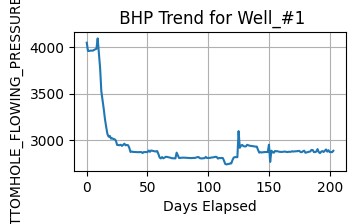

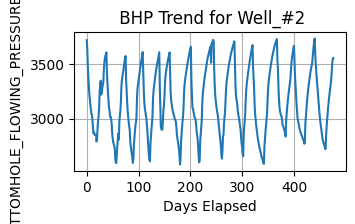

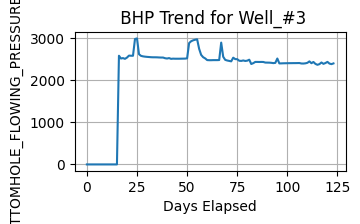

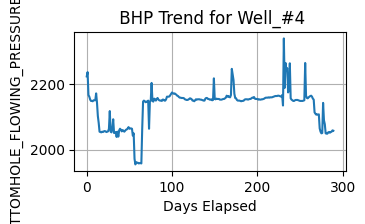

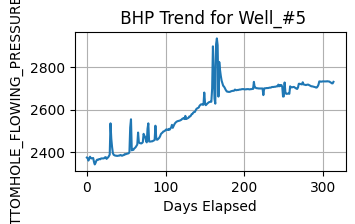

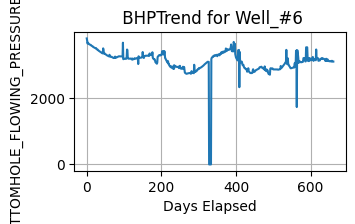

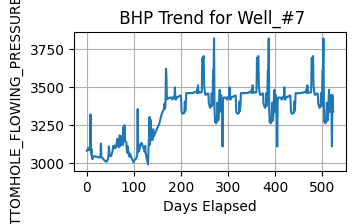

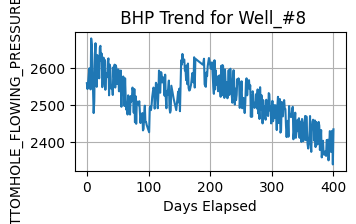

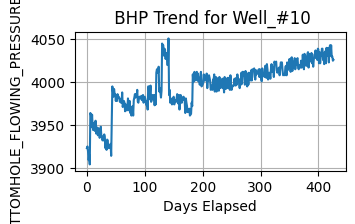

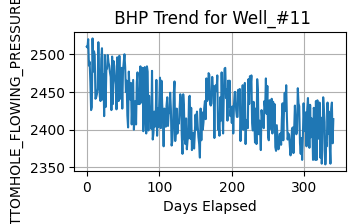

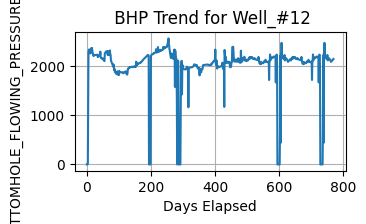

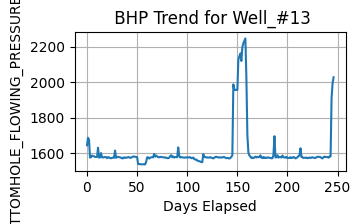

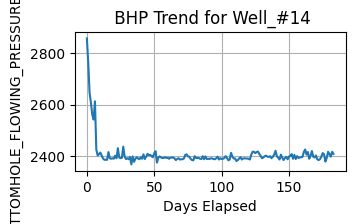

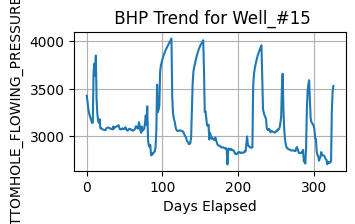

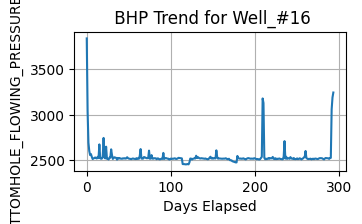

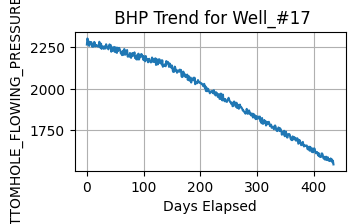

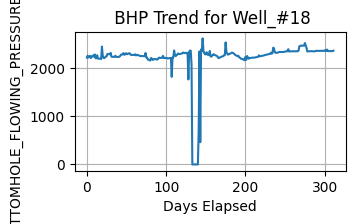

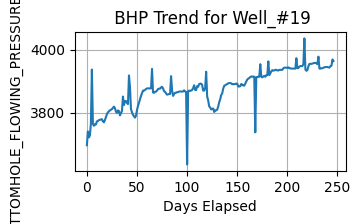

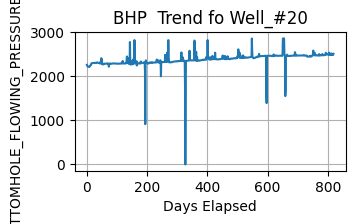

In [29]:
# below is plot for bottom_flowing_pressure trend for each well over time


# Pick a sample well
sample_well = df['WELL_NAME'].unique()[0]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[1]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[2]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[3]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[4]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[5]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHPTrend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[6]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[7]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[9]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[10]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[11]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[12]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[13]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[14]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[15]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[16]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[17]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[18]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" BHP Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[19]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f"BHP  Trend fo {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("BOTTOMHOLE_FLOWING_PRESSURE (PSI)")
plt.grid()
plt.show()

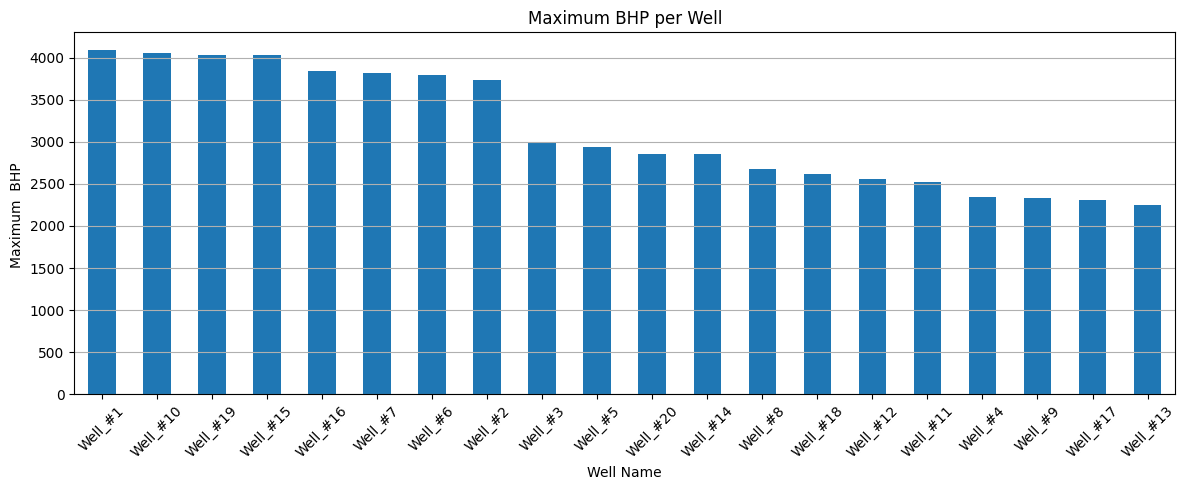

In [30]:
# Group by well and compute Maximum bottomhole_flowing_presure per well
max_bhp = df.groupby('WELL_NAME')['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_bhp.plot(kind='bar')
plt.title("Maximum BHP per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum  BHP ")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


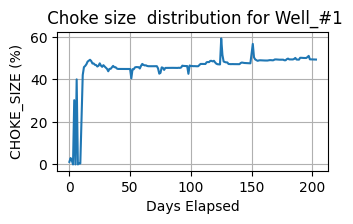

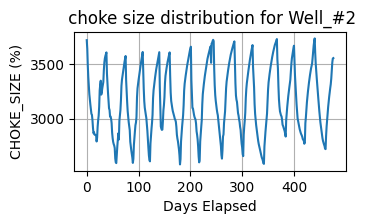

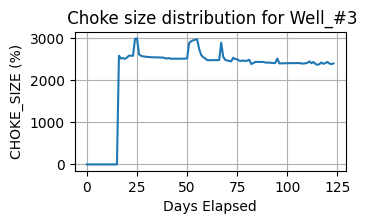

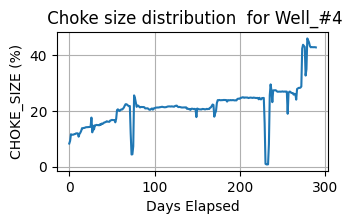

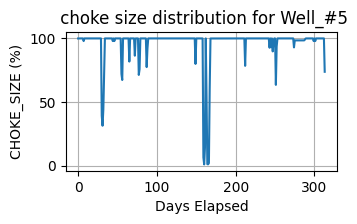

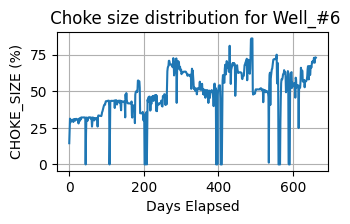

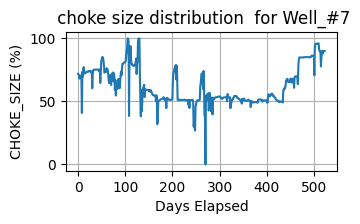

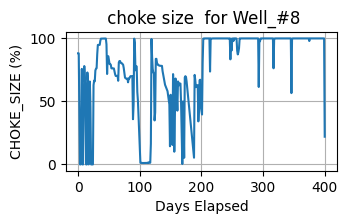

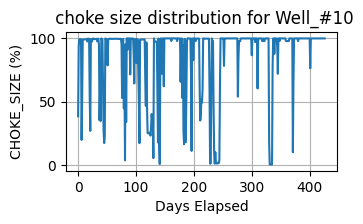

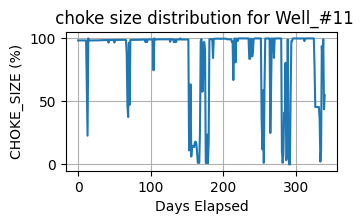

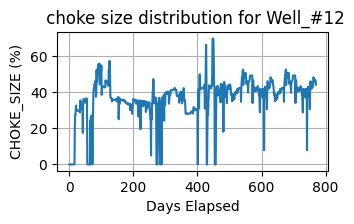

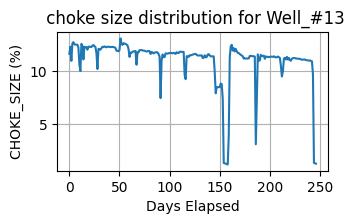

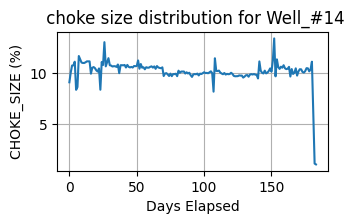

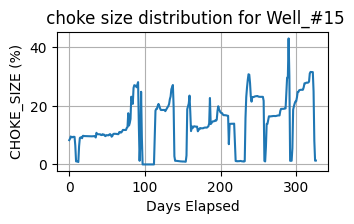

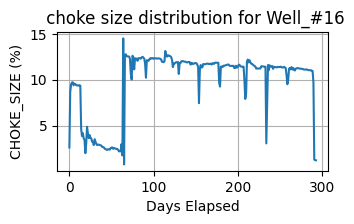

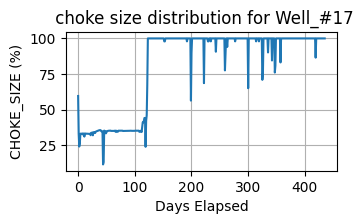

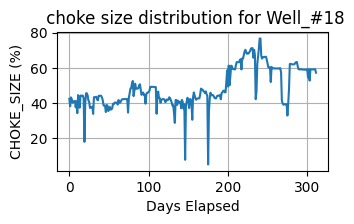

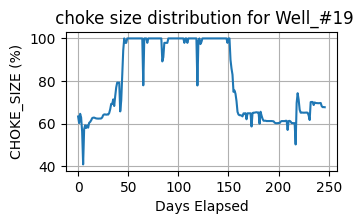

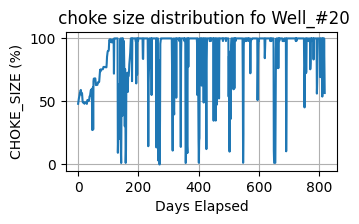

In [31]:
# below is plot for choke size distribution for each well over time


# Pick a sample well
sample_well = df['WELL_NAME'].unique()[0]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" Choke size  distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[1]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[2]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])
plt.title(f" Choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[3]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" Choke size distribution  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[4]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[5]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" Choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[6]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[7]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[9]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[10]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[11]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[12]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[13]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[14]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[15]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[16]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[17]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[18]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[19]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CHOKE_SIZE (%)'])
plt.title(f" choke size distribution fo {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

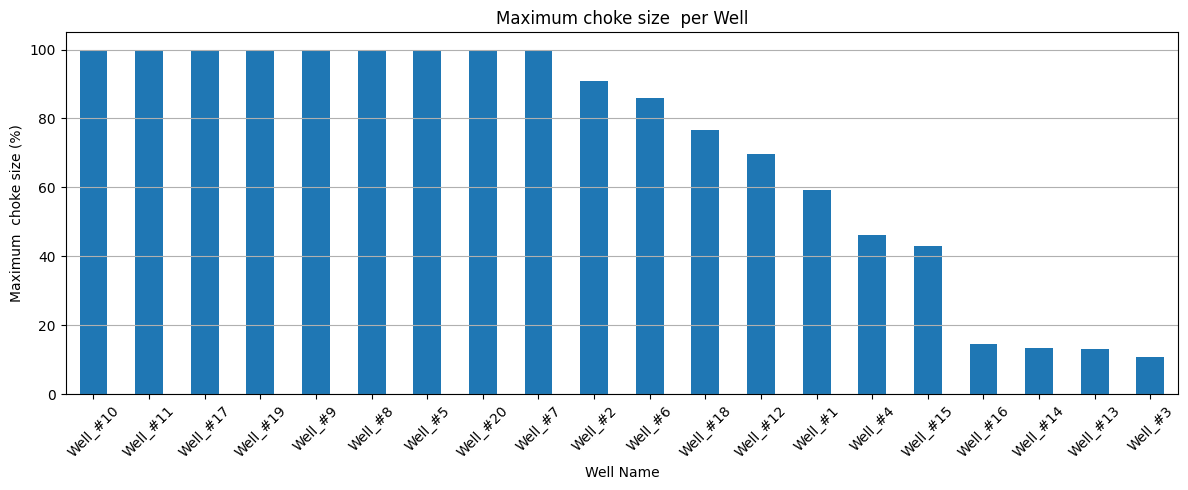

In [32]:
# Group by well and compute Maximum  choke size  per well
max_choke_size = df.groupby('WELL_NAME')['CHOKE_SIZE (%)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_choke_size.plot(kind='bar')
plt.title("Maximum choke size  per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum  choke size (%)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


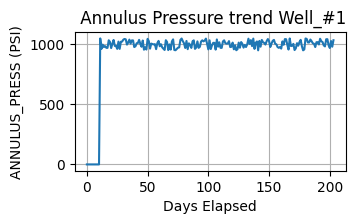

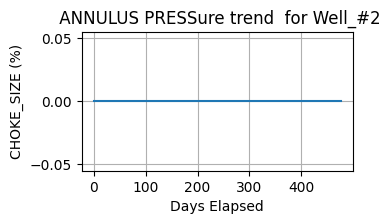

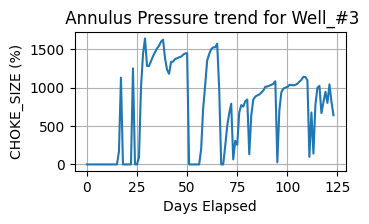

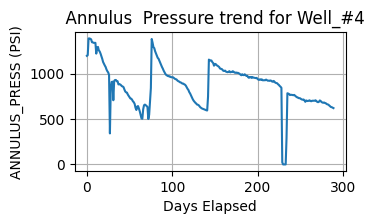

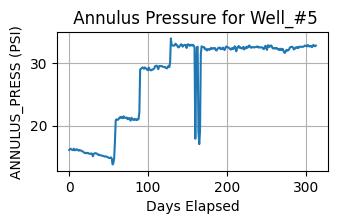

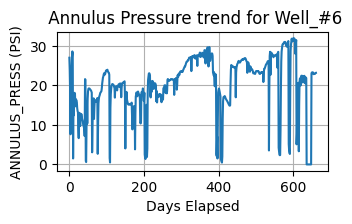

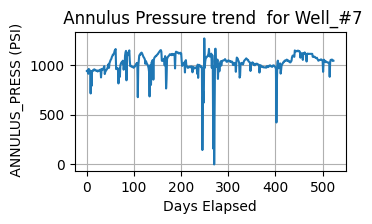

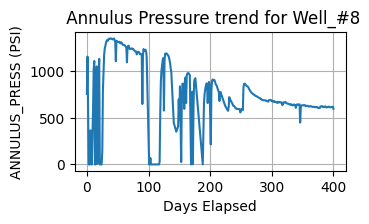

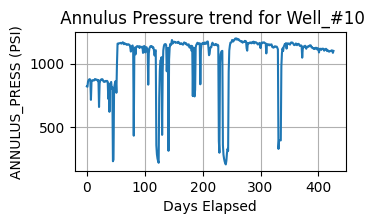

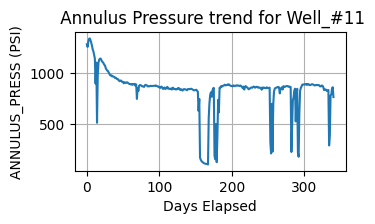

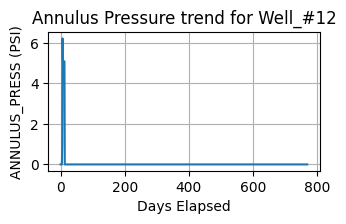

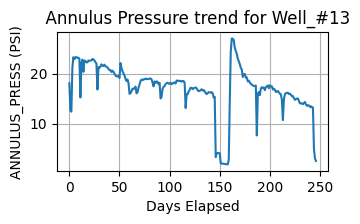

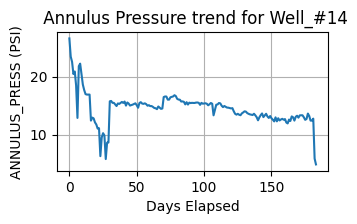

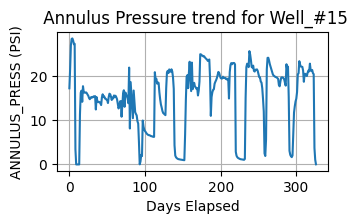

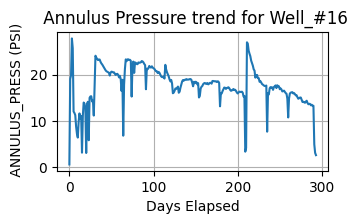

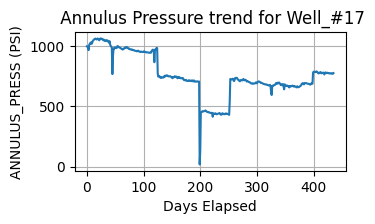

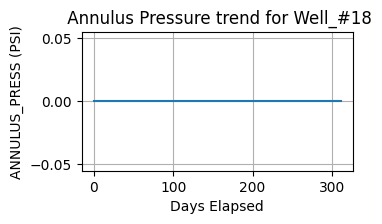

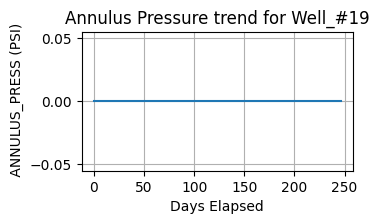

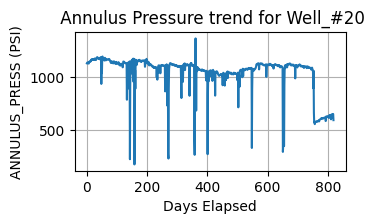

In [33]:
# below is plot for Annulus Pressure  trend for each well over time


# Pick a sample well
sample_well = df['WELL_NAME'].unique()[0]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[1]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" ANNULUS PRESSure trend  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[2]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CHOKE_SIZE (%)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[3]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f"  Annulus  Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[4]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[5]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[6]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel(' ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[7]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[9]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[10]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[11]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f"Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[12]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f"  Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[13]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[14]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[15]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel(' ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[16]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[17]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[18]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f"Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel(' ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[19]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['ANNULUS_PRESS (PSI)'])
plt.title(f" Annulus Pressure trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('ANNULUS_PRESS (PSI)')
plt.grid()
plt.show()

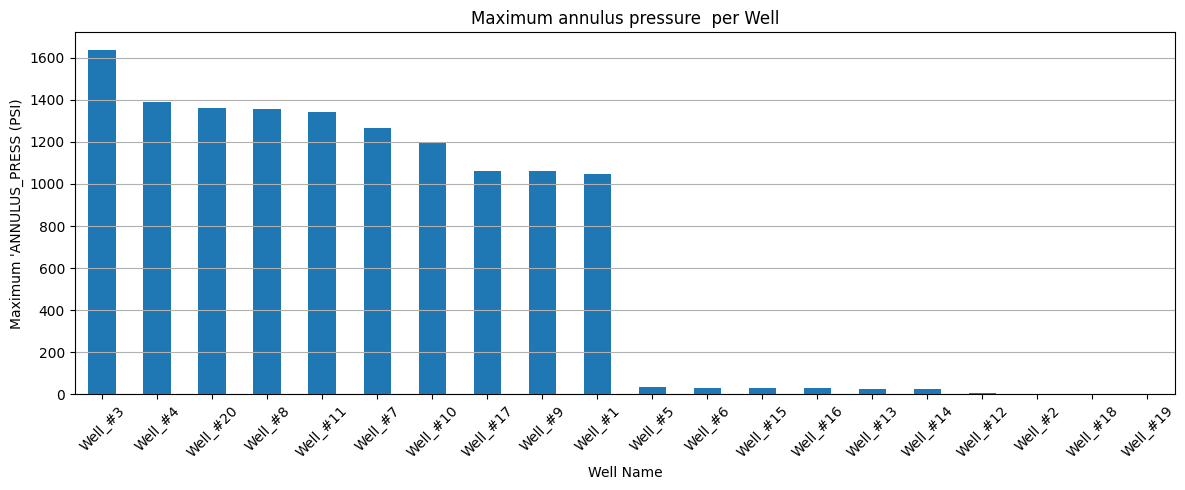

In [34]:
# Group by well and compute Maximum  annulus pressure   per well
max_annulus_pressure = df.groupby('WELL_NAME')['ANNULUS_PRESS (PSI)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_annulus_pressure.plot(kind='bar')
plt.title("Maximum annulus pressure  per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum 'ANNULUS_PRESS (PSI)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

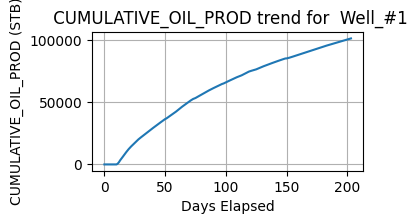

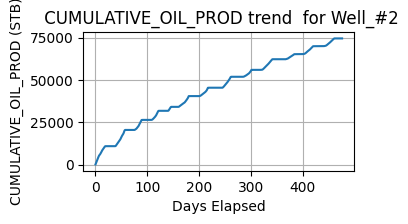

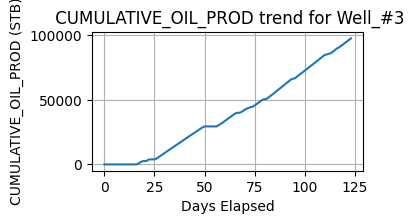

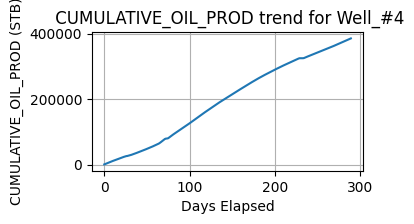

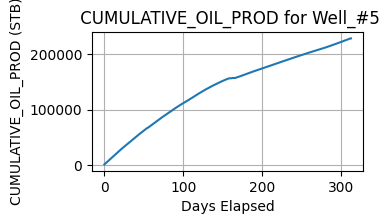

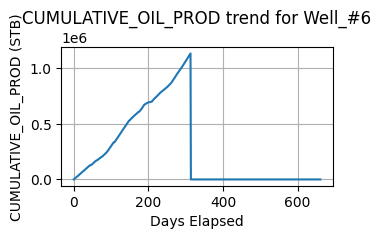

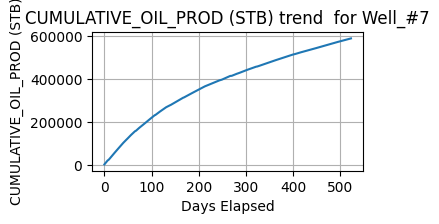

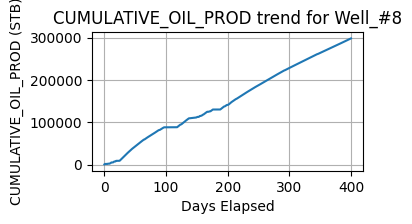

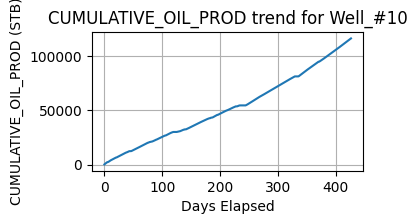

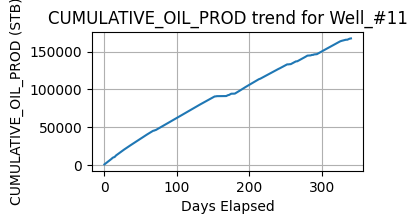

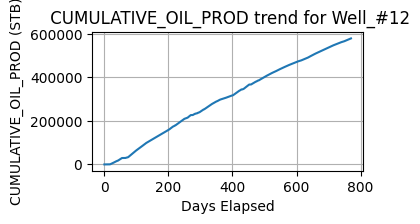

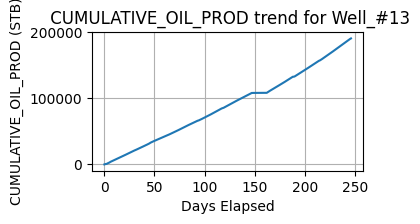

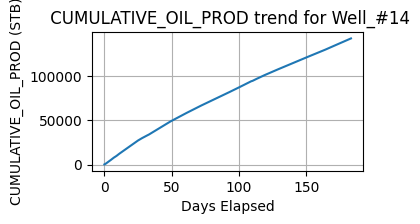

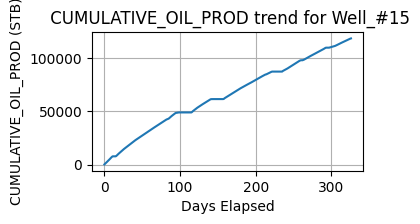

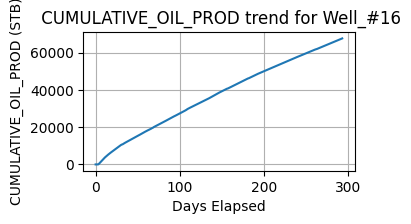

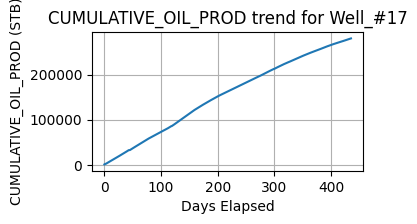

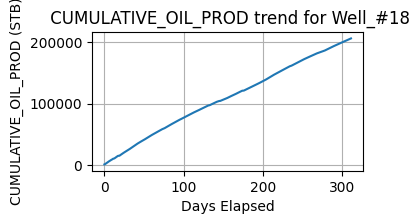

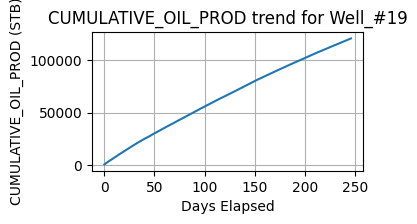

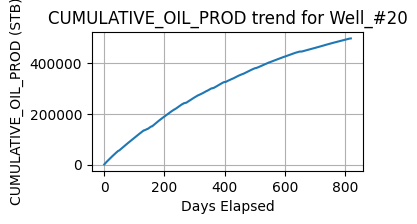

In [35]:
# below is plot for Cumulative oil production  trend for each well over time


# Pick a sample well
sample_well = df['WELL_NAME'].unique()[0]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for  {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[1]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[2]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[3]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[4]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[5]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[6]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD (STB) trend  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[7]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[9]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[10]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[11]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[12]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[13]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[14]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[15]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[16]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[17]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f" CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[18]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[19]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_OIL_PROD (STB)'])
plt.title(f"CUMULATIVE_OIL_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_OIL_PROD (STB)')
plt.grid()
plt.show()

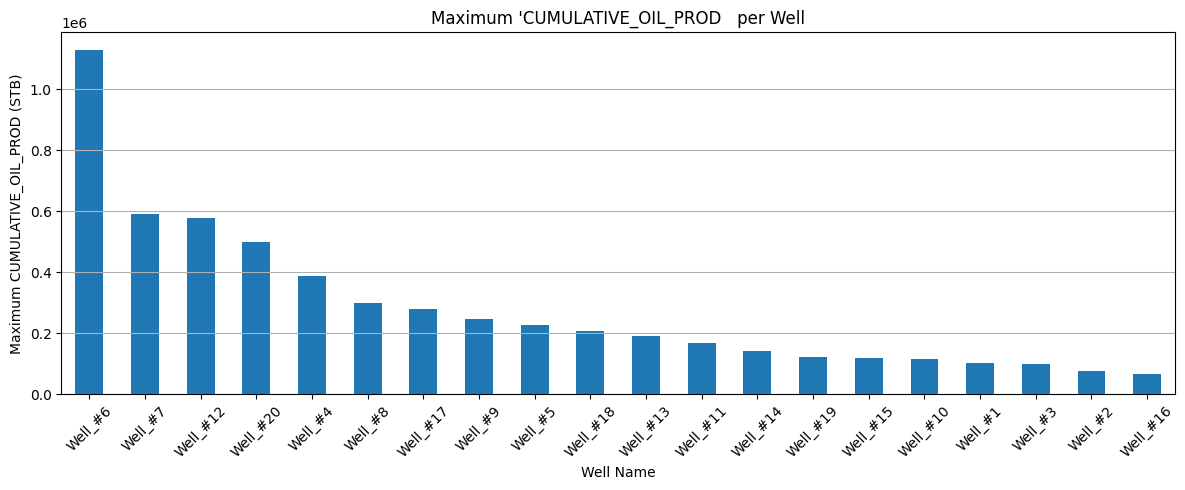

In [36]:
# Group by well and compute Maximum  cumulative oil production  per well
max_oil_prod = df.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD (STB)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_oil_prod.plot(kind='bar')
plt.title("Maximum 'CUMULATIVE_OIL_PROD   per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum CUMULATIVE_OIL_PROD (STB)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

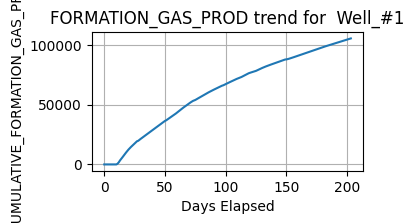

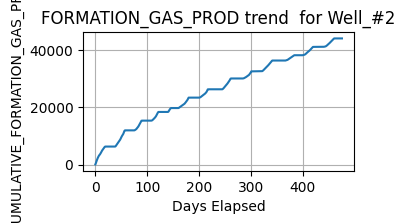

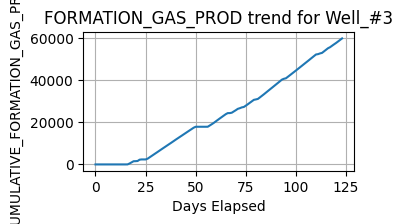

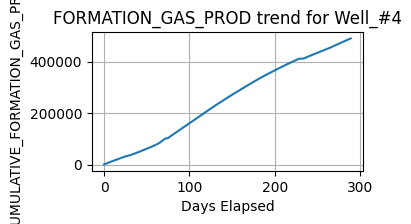

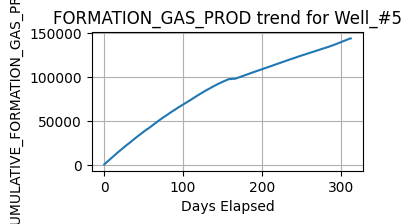

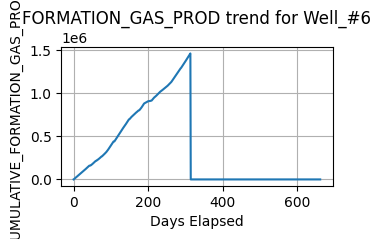

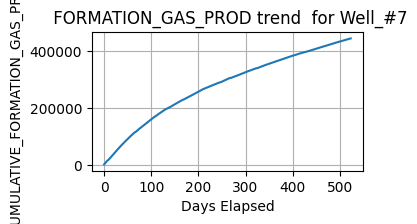

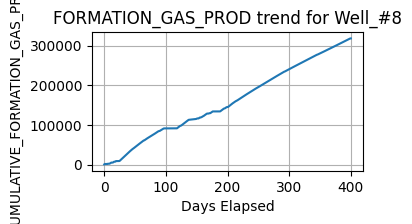

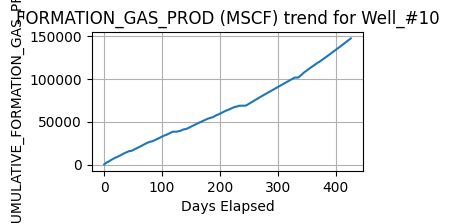

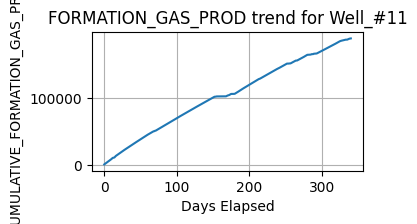

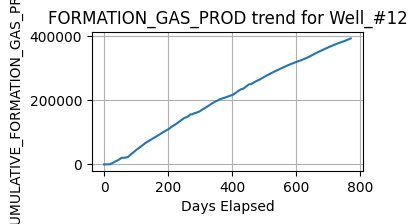

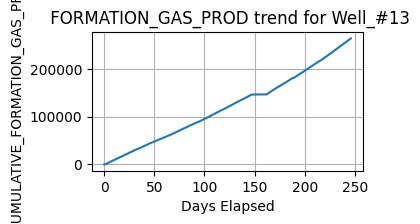

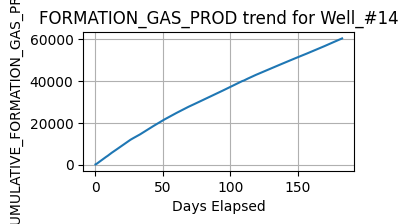

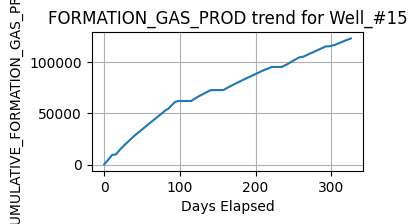

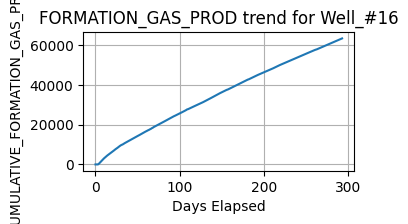

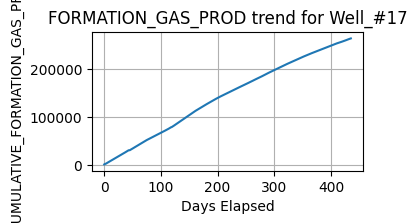

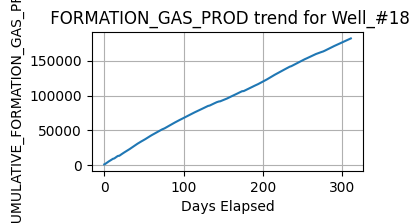

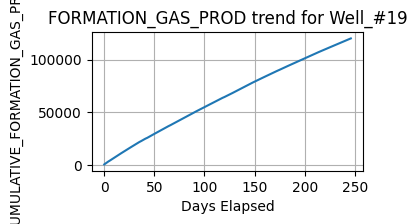

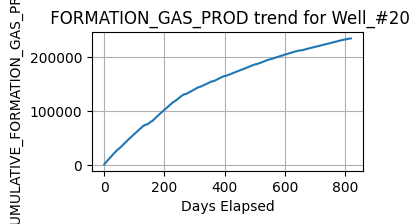

In [37]:
# below is the plot for Cumulative formation gas production  trend for each well over time


# Pick a sample well   'CUMULATIVE_FORMATION_GAS_PROD (MSCF)'
sample_well = df['WELL_NAME'].unique()[0]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for  {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[1]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[2]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[3]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[4]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[5]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[6]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f" FORMATION_GAS_PROD trend  for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[7]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[9]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD (MSCF) trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[10]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[11]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[12]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f" FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[13]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[14]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[15]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[16]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[17]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f" FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[18]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f"FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[19]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'])
plt.title(f" FORMATION_GAS_PROD trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel('CUMULATIVE_FORMATION_GAS_PROD ')
plt.grid()
plt.show()

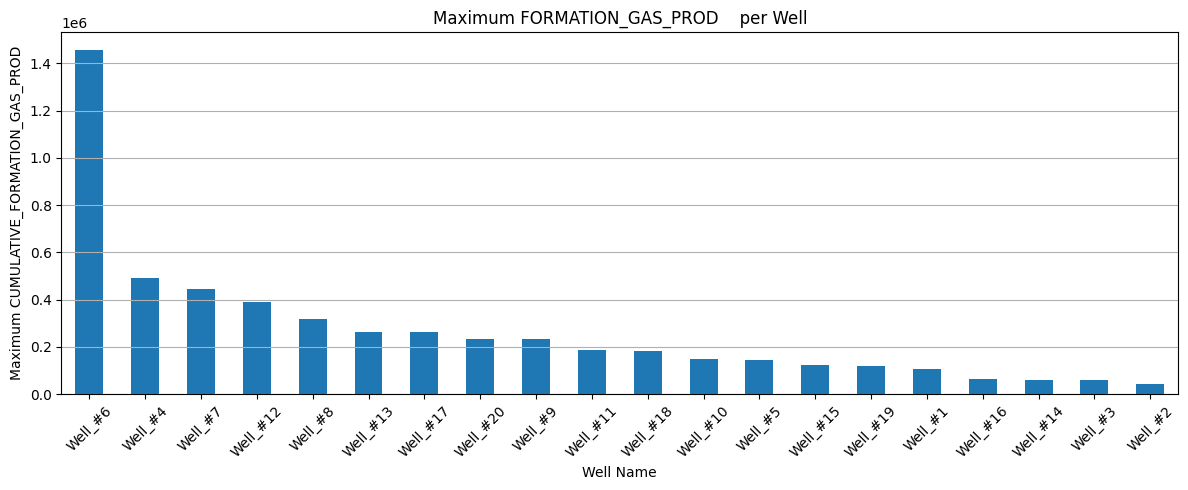

In [38]:
# Group by well and compute Maximum  cumulative formation gas production  per well
max_gas_prod = df.groupby('WELL_NAME')['CUMULATIVE_FORMATION_GAS_PROD (MSCF)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_gas_prod.plot(kind='bar')
plt.title("Maximum FORMATION_GAS_PROD    per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum CUMULATIVE_FORMATION_GAS_PROD")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

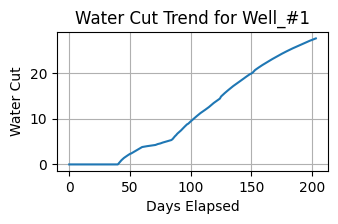

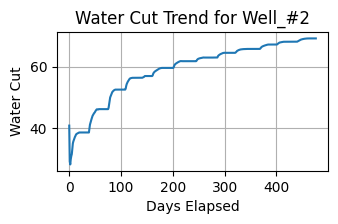

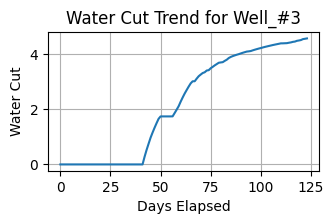

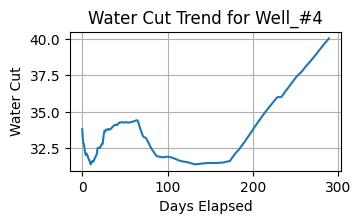

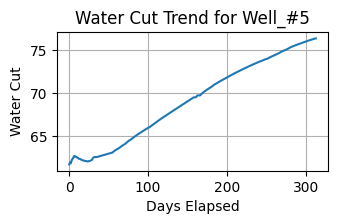

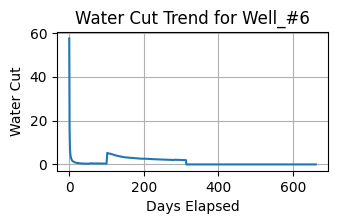

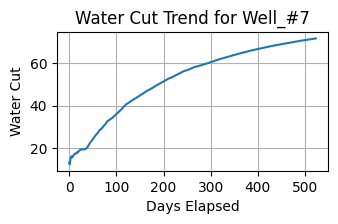

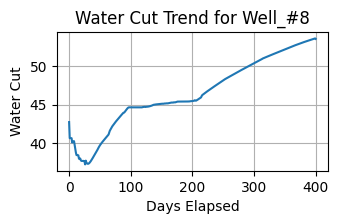

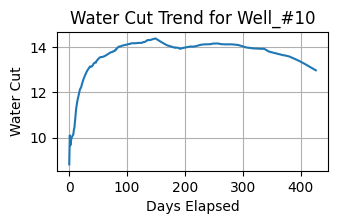

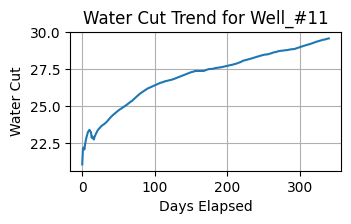

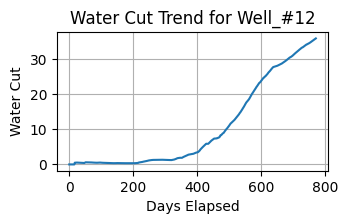

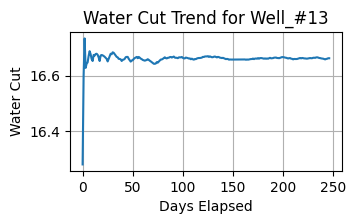

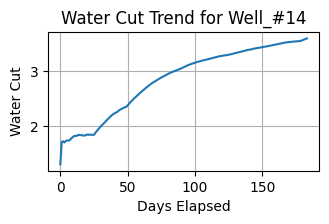

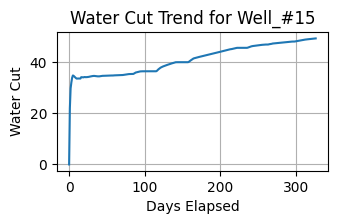

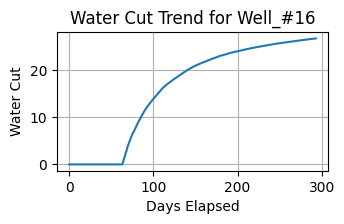

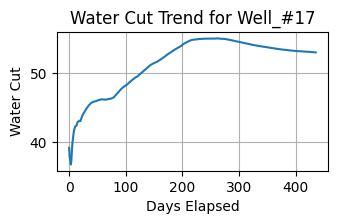

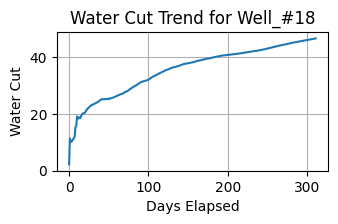

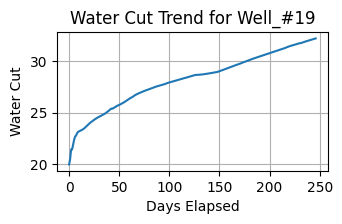

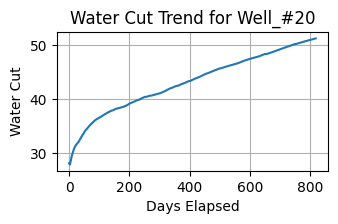

In [39]:
# below is the plot for Water cut trend for each well over time

# Pick a sample well
sample_well = df['WELL_NAME'].unique()[0]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[1]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[2]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[3]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[4]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[5]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[6]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[7]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[9]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[10]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[11]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[12]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[13]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[14]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[15]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[16]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[17]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[18]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[19]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['WATER_CUT (%)'])
plt.title(f"Water Cut Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("Water Cut")
plt.grid()
plt.show()

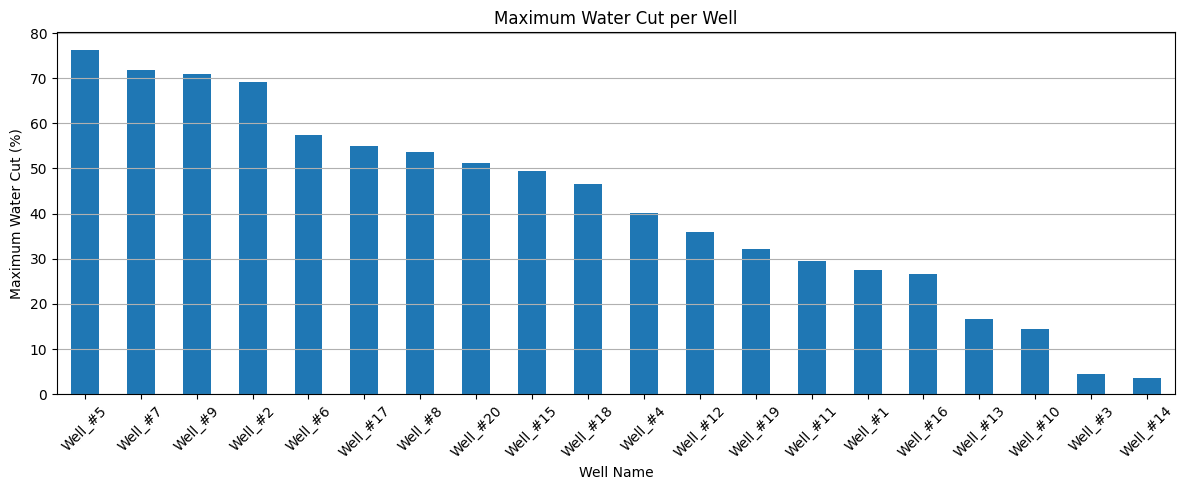

In [40]:
# Group by well and compute maximum water cut per well
max_wc = df.groupby('WELL_NAME')['WATER_CUT (%)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_wc.plot(kind='bar')
plt.title("Maximum Water Cut per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum Water Cut (%)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

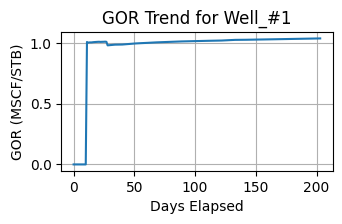

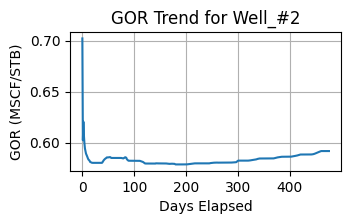

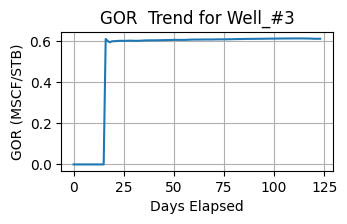

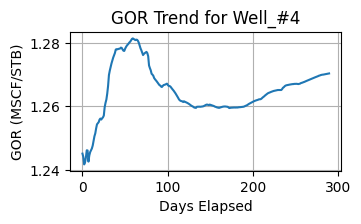

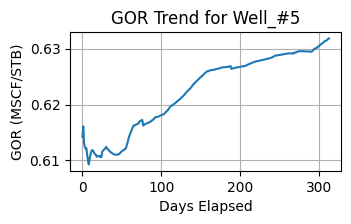

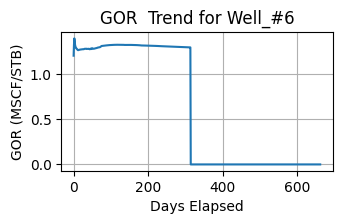

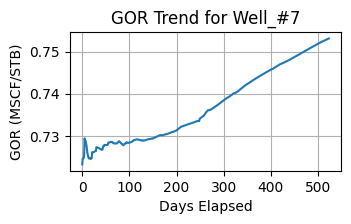

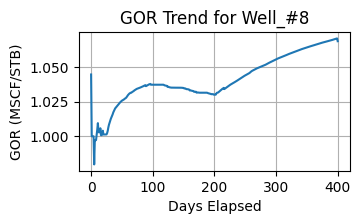

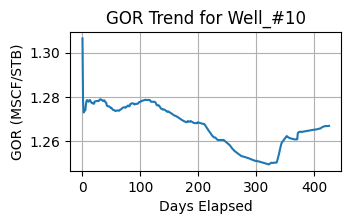

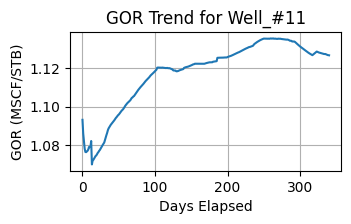

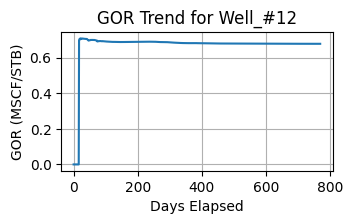

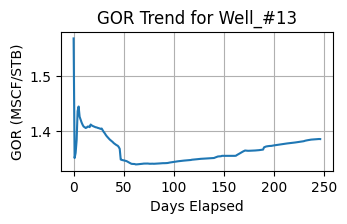

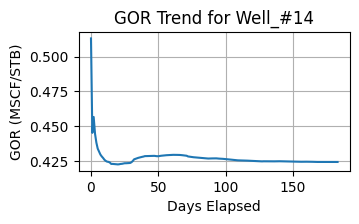

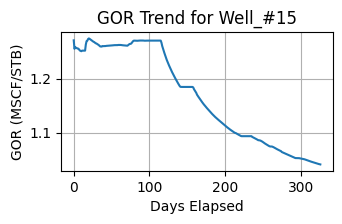

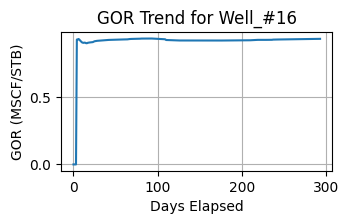

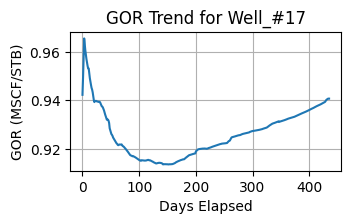

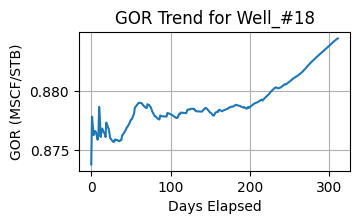

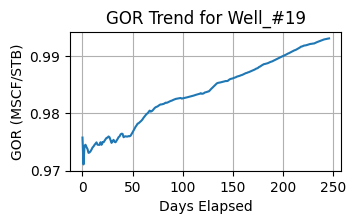

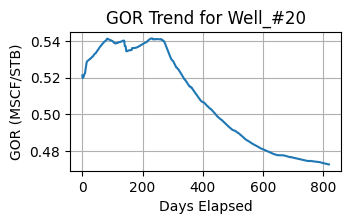

In [41]:
 # below is the plot for GOR trend for each well over time

# Pick a sample well
sample_well = df['WELL_NAME'].unique()[0]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[1]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[2]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR  Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[3]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[4]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[5]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR  Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[6]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[7]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[9]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[10]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[11]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[12]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[13]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[14]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[15]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()


sample_well = df['WELL_NAME'].unique()[16]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[17]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[18]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()

sample_well = df['WELL_NAME'].unique()[19]

# Filter and plot
plt.figure(figsize=(3.5, 1.8))
df_sample = df[df['WELL_NAME'] == sample_well]
plt.plot(df_sample['days_elapsed'], df_sample['GOR (MSCF/STB)'])
plt.title(f"GOR Trend for {sample_well}")
plt.xlabel("Days Elapsed")
plt.ylabel("GOR (MSCF/STB)")
plt.grid()
plt.show()



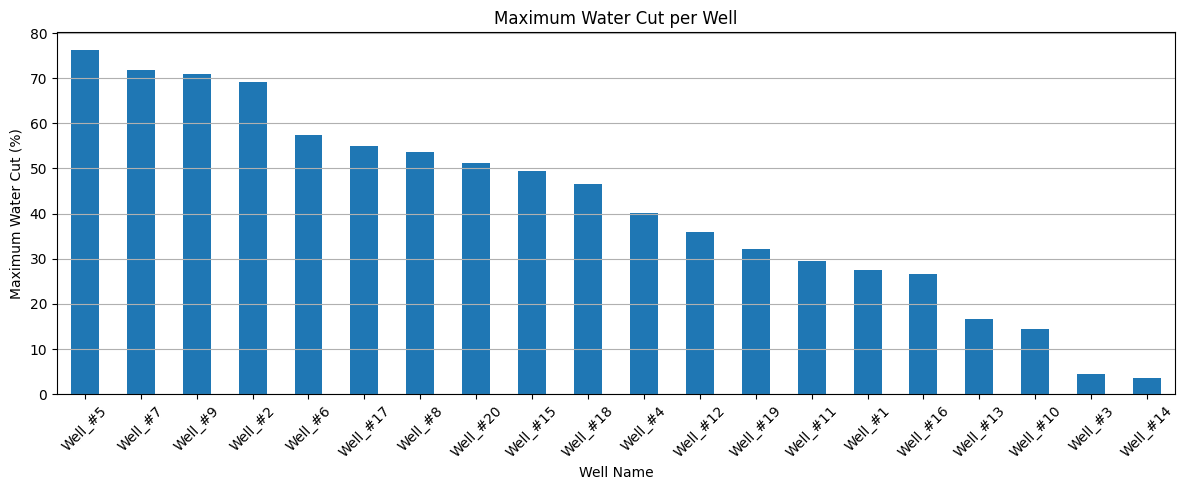

In [42]:
# Group by well and compute maximum water cut per well
max_wc = df.groupby('WELL_NAME')['WATER_CUT (%)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_wc.plot(kind='bar')
plt.title("Maximum Water Cut per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum Water Cut (%)")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

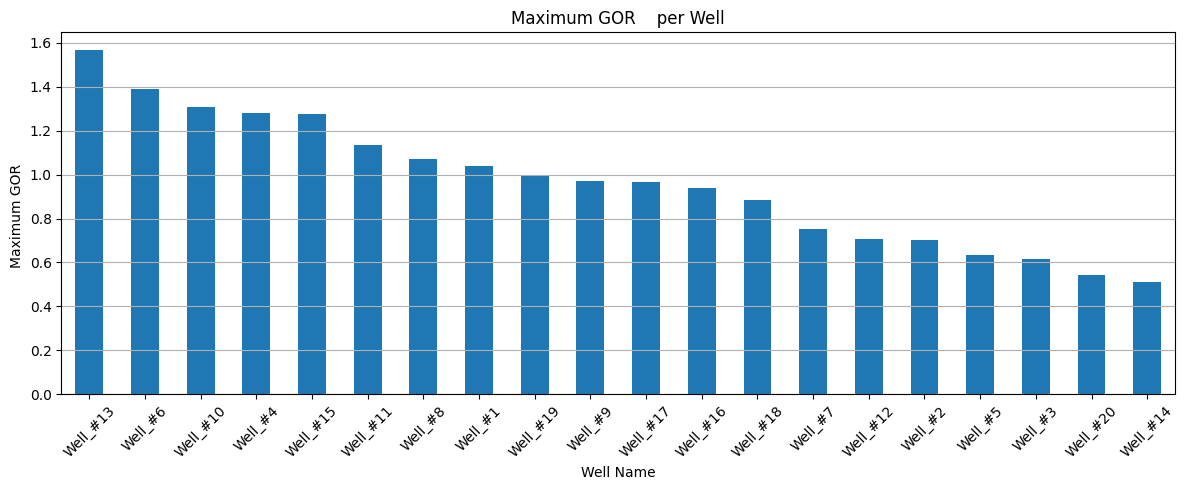

In [45]:
 # Group by well and compute Maximum  GOR  per well
max_GOR = df.groupby('WELL_NAME')['GOR (MSCF/STB)'].max().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
max_GOR.plot(kind='bar')
plt.title("Maximum GOR    per Well")
plt.xlabel("Well Name")
plt.ylabel("Maximum GOR ")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MODEL PREPROCESSING

In [46]:
# Convert the 'WELL_NAME' column  to a categorical data type
df['WELL_NAME'] = df['WELL_NAME'].astype('category')

In [47]:
# TO perform one-hot encoding on 'WELL_NAME' and
# Each unique well name becomes a new column with values 0 or 1 for model to understand each well id
df = pd.get_dummies(df, columns=['WELL_NAME'])

In [48]:
#display columns
df.columns

Index(['PROD_DATE', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
       'DOWNHOLE_TEMPERATURE (deg F)', 'ANNULUS_PRESS (PSI)', 'CHOKE_SIZE (%)',
       'WELL_HEAD_PRESSURE (PSI)', 'WELL_HEAD_TEMPERATURE (deg F)',
       'CUMULATIVE_OIL_PROD (STB)', 'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)', 'CUMULATIVE_WATER_PROD (BBL)',
       'days_elapsed', 'GOR (MSCF/STB)', 'WATER_CUT (%)', 'WELL_NAME_Well_#1',
       'WELL_NAME_Well_#10', 'WELL_NAME_Well_#11', 'WELL_NAME_Well_#12',
       'WELL_NAME_Well_#13', 'WELL_NAME_Well_#14', 'WELL_NAME_Well_#15',
       'WELL_NAME_Well_#16', 'WELL_NAME_Well_#17', 'WELL_NAME_Well_#18',
       'WELL_NAME_Well_#19', 'WELL_NAME_Well_#2', 'WELL_NAME_Well_#20',
       'WELL_NAME_Well_#3', 'WELL_NAME_Well_#4', 'WELL_NAME_Well_#5',
       'WELL_NAME_Well_#6', 'WELL_NAME_Well_#7', 'WELL_NAME_Well_#8',
       'WELL_NAME_Well_#9'],
      dtype='object')

# Model Overview for Reservoir, Saturation, and GOR Classification

To build a model for classifying wells into three categories reservoir type, saturation status (saturated or undersaturated), and gas-oil ratio status (above solution GOR: `aSolGOR`, or below solution GOR: `bSolGOR`), we predict two key parameters: bottomhole flowing pressure (BHP) and gas-oil ratio (GOR). We use two models, Random Forest and Linear Regression, with Random Forest being the more robust choice due to its ability to handle complex, non-linear relationships in the data.

After obtaining the model predictions, we apply a logic based approach to classify each well. First, we add 200 psi to the maximum predicted BHP to account for the difference between bottomhole pressure and reservoir pressure. We then assign each well to a reservoir based on predefined pressure intervals, comparing the adjusted pressure to the initial and current average reservoir pressures for each reservoir. If the adjusted pressure falls within a reservoir's pressure range, the well is classified as belonging to that reservoir.

For saturation classification, we compare the adjusted BHP (predicted BHP + 200 psi) to the bubble point pressure of the assigned reservoir. If the adjusted pressure is below the bubble point, the well is classified as saturated; if above, it is classified as undersaturated.

For GOR classification, we compare the predicted average GOR for each well to the initial solution GOR of the assigned reservoir. If the predicted GOR is below the initial solution GOR, the well is classified as `bSolGOR`; if above, it is classified as `aSolGOR`; and if within a small tolerance (0.01), it is classified as `COMBO`.

We use logic based classification post-prediction because training a machine learning model to predict all three classifications directly requires extensive data and iterative processes, which can be challenging. This hybrid approach combining robust Random Forest predictions with deterministic logic ensures accurate and efficient classification of reservoir, saturation, and GOR status.

In [49]:
#create input and output feature
x = df.drop(columns=['BOTTOMHOLE_FLOWING_PRESSURE (PSI)','PROD_DATE', 'GOR (MSCF/STB)' ])
y = df[['BOTTOMHOLE_FLOWING_PRESSURE (PSI)', 'GOR (MSCF/STB)']]

In [50]:
 # split the dataset into train and test  80% train and 20% test
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
 #Standardize features using Z-score normalization to improve model performance
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [52]:
# initialise and train the model with dataset
LR = LinearRegression()
LR.fit(x_train_scaled, y_train_scaled)

#make prediction
LR_pred = LR.predict(x_test_scaled)

#evaluate the performance of the model
r2 = r2_score(y_test_scaled, LR_pred)
rmse = root_mean_squared_error(y_test_scaled, LR_pred)
mae = mean_absolute_error(y_test_scaled, LR_pred)

print(f"R-squared (R²): {r2}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


R-squared (R²): 0.9088741324240808
 Root Mean Squared Error (RMSE): 0.3006636782448495
Mean Absolute Error (MAE): 0.18853650892089538


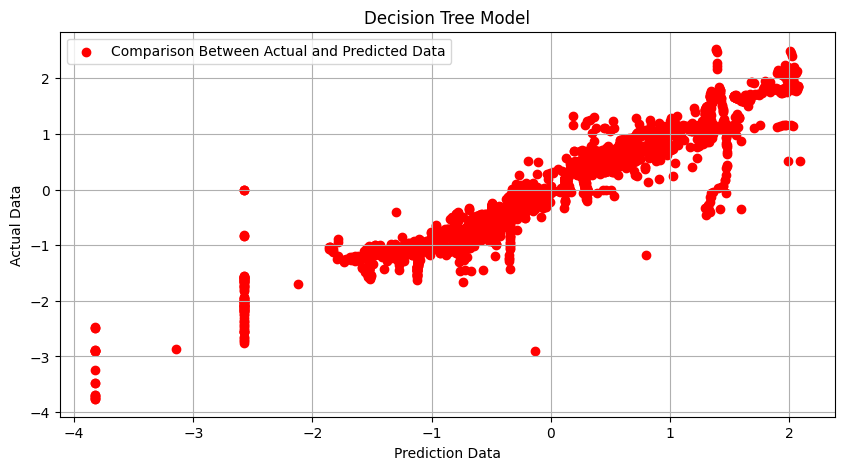

In [53]:
plt.figure(figsize = (10,5))
plt.scatter(y_test_scaled, LR_pred, color = "red", label = "Comparison Between Actual and Predicted Data")
plt.legend()
plt.grid()
plt.title("Decision Tree Model")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()


In [54]:
# Reservoir data
reservoir_bubble_points = {
    'ACHI': 3300,
    'KEMA': 4000,
    'MAKO': 3500,
    'DEPU': 2800,
    'JANI': 4300
}

solution_gor = {
    'ACHI': 0.8,
    'KEMA': 0.6,
    'MAKO': 0.5,
    'DEPU': 1.2,
    'JANI': 1.0
}

# Classification function for a single well
def classify_well(max_pressure, avg_gor):
    # Use max pressure before adding 200 psi
    adjusted_pressure = max_pressure + 200

    # Reservoir classification with range of the initial reservoir pressure and current average reservoir pressure
    pressure_ranges = [
        (2700, 3500, 'ACHI'),
        (3900, 4200, 'KEMA'),
        (3000, 3500, 'MAKO'),
        (2400, 2800, 'DEPU'),
        (4200, 4500, 'JANI')
    ]

    # Find the closest pressure range
    reservoir = None
    min_distance = float('inf')
    for min_p, max_p, res in pressure_ranges:
        if min_p <= adjusted_pressure < max_p:
            reservoir = res
            break
        # Calculate distance to the range
        distance = min(abs(adjusted_pressure - min_p), abs(adjusted_pressure - max_p))
        if distance < min_distance:
            min_distance = distance
            reservoir = res

    # Saturation classification
    bubble_point = reservoir_bubble_points[reservoir]
    saturation = "UNDERSATURATED" if adjusted_pressure > bubble_point else "SATURATED"

    # GOR classification
    sol_gor = solution_gor[reservoir]
    gor_classification = (
        "COMBO" if abs(avg_gor - sol_gor) < 0.01 else
        "aSolGOR" if avg_gor > sol_gor else
        "bSolGOR"
    )

    return reservoir, saturation, gor_classification

# Reverse dummy encoding to get original well names
def get_well_names(x):
    well_columns = [col for col in x.columns if col.startswith('WELL_NAME_')]
    well_names = []

    for idx, row in x.iterrows():
        for col in well_columns:
            if row[col] == 1:
                well_name = col.replace('WELL_NAME_', '')
                well_names.append(well_name)
                break
        else:
            well_names.append('DEPU')  # Fallback to DEPU if no match

    return well_names

# Main prediction and classification process
def predict_and_classify(LR, x_test, scaler, scaler_y):
    # Scale test data
    x_test_scaled = scaler.transform(x_test)

    # Get predictions and reverse scaling
    predictions_scaled = LR.predict(x_test_scaled)
    predictions = scaler_y.inverse_transform(predictions_scaled)

    # Create DataFrame with predictions and well names
    well_names = get_well_names(x_test)
    pred_df = pd.DataFrame({
        'Well_Name': well_names,
        'BHP': predictions[:, 0],  # Bottomhole flowing pressure
        'GOR': predictions[:, 1]   # GOR
    })

    # Aggregate by Well_Name: max BHP and average GOR
    agg_df = pred_df.groupby('Well_Name').agg({
        'BHP': 'max',
        'GOR': 'mean'
    }).reset_index()

    # Ensure exactly 20 wells
    if len(agg_df) != 20:
        print(f"Warning: Found {len(agg_df)} wells instead of 20. Adjust input data if needed.")

    # Classify each well
    results = []
    for _, row in agg_df.iterrows():
        well_name = row['Well_Name']
        max_bhp = row['BHP']
        avg_gor = row['GOR']

        reservoir, saturation, gor_classification = classify_well(max_bhp, avg_gor)

        results.append({
            'Well_Name': well_name,
            'Reservoir Name': reservoir,
            'Reservoir Type': saturation,
            'Formation GOR Trend': gor_classification
        })

    # Create final DataFrame
    result_df = pd.DataFrame(results)

    # Sort wells in numerical order (Well_#1, Well_#2, ..., Well_#20)
    result_df['Well_Number'] = result_df['Well_Name'].str.extract(r'Well_#(\d+)').astype(int)
    result_df = result_df.sort_values('Well_Number').reset_index(drop=True).drop(columns='Well_Number')

    return result_df

# Process predictions (assuming Rf, x_test, scaler, scaler_y are defined)
result_df = predict_and_classify(LR, x_test, scaler, scaler_y)

# Output results
print("\nPrediction Results:")
print(result_df[['Well_Name', 'Reservoir Name', 'Reservoir Type', 'Formation GOR Trend']])

# Save to CSV
result_df[['Reservoir Name', 'Reservoir Type', 'Formation GOR Trend']].to_csv('prediction_results_test.csv', index=False)


Prediction Results:
   Well_Name Reservoir Name  Reservoir Type Formation GOR Trend
0    Well_#1           ACHI       SATURATED             aSolGOR
1    Well_#2           KEMA       SATURATED               COMBO
2    Well_#3           ACHI       SATURATED             bSolGOR
3    Well_#4           DEPU       SATURATED             aSolGOR
4    Well_#5           ACHI       SATURATED             bSolGOR
5    Well_#6           KEMA       SATURATED             aSolGOR
6    Well_#7           ACHI  UNDERSATURATED             bSolGOR
7    Well_#8           ACHI       SATURATED             aSolGOR
8    Well_#9           DEPU       SATURATED             bSolGOR
9   Well_#10           JANI  UNDERSATURATED             aSolGOR
10  Well_#11           ACHI       SATURATED             aSolGOR
11  Well_#12           DEPU       SATURATED             bSolGOR
12  Well_#13           DEPU       SATURATED             aSolGOR
13  Well_#14           DEPU       SATURATED             bSolGOR
14  Well_#15       

In [55]:
Rf = RandomForestRegressor( max_depth = 20000, random_state=42)
Rf.fit(x_train_scaled, y_train_scaled)

# make prediction
Rf_pred = Rf.predict(x_test_scaled)

#evaluate the performance of the model
r2 = r2_score(y_test_scaled, Rf_pred)
rmse = root_mean_squared_error(y_test_scaled, Rf_pred)
mae = mean_absolute_error(y_test_scaled, Rf_pred)

print(f"R-squared (R²): {r2}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9954898684083292
 Root Mean Squared Error (RMSE): 0.06682786598250752
Mean Absolute Error (MAE): 0.018064188101102715


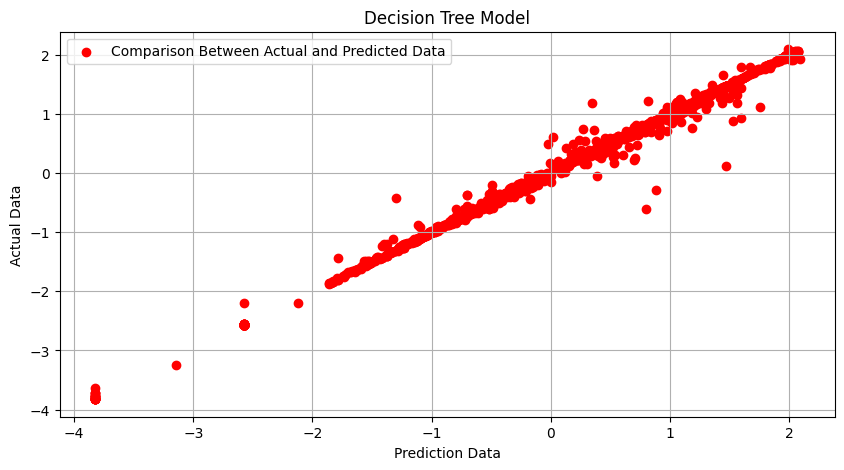

In [56]:
plt.figure(figsize = (10,5))
plt.scatter(y_test_scaled, Rf_pred, color = "red", label = "Comparison Between Actual and Predicted Data")
plt.legend()
plt.grid()
plt.title("Decision Tree Model")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()

In [57]:
# Below is the logic code that  accept the prediction made on test dataset from the trained model (Linear Regression ) and asigned the classificaton

# Reservoir data
reservoir_bubble_points = {
    'ACHI': 3300,
    'KEMA': 4000,
    'MAKO': 3500,
    'DEPU': 2800,
    'JANI': 4300
}

solution_gor = {
    'ACHI': 0.8,
    'KEMA': 0.6,
    'MAKO': 0.5,
    'DEPU': 1.2,
    'JANI': 1.0
}

# Classification function for a single well
def classify_well(max_pressure, avg_gor):
    # Use max pressure before adding 200 psi
    adjusted_pressure = max_pressure + 200

    # Reservoir classification with  range of initial and current average reservir pressure
    pressure_ranges = [
        (2700, 3500, 'ACHI'),
        (3900, 4200, 'KEMA'),
        (3000, 3500, 'MAKO'),
        (2400, 2800, 'DEPU'),
        (4200, 4500, 'JANI')
    ]

    # Find the closest pressure range
    reservoir = None
    min_distance = float('inf')
    for min_p, max_p, res in pressure_ranges:
        if min_p <= adjusted_pressure < max_p:
            reservoir = res
            break
        # Calculate distance to the range
        distance = min(abs(adjusted_pressure - min_p), abs(adjusted_pressure - max_p))
        if distance < min_distance:
            min_distance = distance
            reservoir = res

    # Saturation classification
    bubble_point = reservoir_bubble_points[reservoir]
    saturation = "UNDERSATURATED" if adjusted_pressure > bubble_point else "SATURATED"

    # GOR classification
    sol_gor = solution_gor[reservoir]
    gor_classification = (
        "COMBO" if abs(avg_gor - sol_gor) < 0.01 else
        "aSolGOR" if avg_gor > sol_gor else
        "bSolGOR"
    )

    return reservoir, saturation, gor_classification

# Reverse dummy encoding to get original well names from onehote encoding
def get_well_names(x):
    well_columns = [col for col in x.columns if col.startswith('WELL_NAME_')]
    well_names = []

    for idx, row in x.iterrows():
        for col in well_columns:
            if row[col] == 1:
                well_name = col.replace('WELL_NAME_', '')
                well_names.append(well_name)
                break
        else:
            well_names.append('DEPU')  # Fallback to DEPU if no match

    return well_names

# Main prediction and classification process
def predict_and_classify(Rf, x_test, scaler, scaler_y):
    # Scale test data
    x_test_scaled = scaler.transform(x_test)

    # Get predictions and reverse scaling
    predictions_scaled = Rf.predict(x_test_scaled)
    predictions = scaler_y.inverse_transform(predictions_scaled)

    # Create DataFrame with predictions and well names
    well_names = get_well_names(x_test)
    pred_df = pd.DataFrame({
        'Well_Name': well_names,
        'BHP': predictions[:, 0],  # Bottomhole flowing pressure
        'GOR': predictions[:, 1]   # GOR
    })

    # Aggregate by Well_Name: max BHP and average GOR
    agg_df = pred_df.groupby('Well_Name').agg({
        'BHP': 'max',
        'GOR': 'mean'
    }).reset_index()

    # Ensure exactly 20 wells
    if len(agg_df) != 20:
        print(f"Warning: Found {len(agg_df)} wells instead of 20. Adjust input data if needed.")

    # Classify each well
    results = []
    for _, row in agg_df.iterrows():
        well_name = row['Well_Name']
        max_bhp = row['BHP']
        avg_gor = row['GOR']

        reservoir, saturation, gor_classification = classify_well(max_bhp, avg_gor)

        results.append({
            'Well_Name': well_name,
            'Reservoir Name': reservoir,
            'Reservoir Type': saturation,
            'Formation GOR Trend': gor_classification
        })

    # Create final DataFrame
    result_df = pd.DataFrame(results)

    # Sort wells in numerical order (Well_#1, Well_#2, ..., Well_#20)
    result_df['Well_Number'] = result_df['Well_Name'].str.extract(r'Well_#(\d+)').astype(int)
    result_df = result_df.sort_values('Well_Number').reset_index(drop=True).drop(columns='Well_Number')

    return result_df

# Process predictions (assuming Rf, x_test, scaler, scaler_y are defined)
result_df = predict_and_classify(Rf, x_test, scaler, scaler_y)

# Output results
print("\nPrediction Results:")
print(result_df[['Well_Name', 'Reservoir Name', 'Reservoir Type', 'Formation GOR Trend']])

# Save to CSV
result_df[['Well_Name', 'Reservoir Name', 'Reservoir Type', 'Formation GOR Trend']].to_csv('prediction_results_entire.csv', index=False)


Prediction Results:
   Well_Name Reservoir Name  Reservoir Type Formation GOR Trend
0    Well_#1           JANI       SATURATED             bSolGOR
1    Well_#2           KEMA       SATURATED             bSolGOR
2    Well_#3           ACHI       SATURATED             bSolGOR
3    Well_#4           DEPU       SATURATED             aSolGOR
4    Well_#5           ACHI       SATURATED             bSolGOR
5    Well_#6           KEMA       SATURATED             aSolGOR
6    Well_#7           KEMA       SATURATED             aSolGOR
7    Well_#8           ACHI       SATURATED             aSolGOR
8    Well_#9           DEPU       SATURATED             bSolGOR
9   Well_#10           JANI       SATURATED             aSolGOR
10  Well_#11           DEPU       SATURATED             bSolGOR
11  Well_#12           DEPU       SATURATED             bSolGOR
12  Well_#13           DEPU       SATURATED             aSolGOR
13  Well_#14           ACHI       SATURATED             bSolGOR
14  Well_#15       

In [58]:
# Below is the logic code that  accept the prediction made on entire  dataset from the trained model (Linear Regression ) and asigned the classificaton
# Reservoir data
reservoir_bubble_points = {
    'ACHI': 3300,
    'KEMA': 4000,
    'MAKO': 3500,
    'DEPU': 2800,
    'JANI': 4300
}

solution_gor = {
    'ACHI': 0.8,
    'KEMA': 0.6,
    'MAKO': 0.5,
    'DEPU': 1.2,
    'JANI': 1.0
}

# Classification function for a single well
def classify_well(max_pressure, avg_gor):
    # Use max pressure before adding 200 psi
    adjusted_pressure = max_pressure + 200

    # Reservoir classification with fallback to closest range
    pressure_ranges = [
        (2700, 3500, 'ACHI'),
        (3900, 4200, 'KEMA'),
        (3000, 3500, 'MAKO'),
        (2400, 2800, 'DEPU'),
        (4200, 4500, 'JANI')
    ]

    # Find the closest pressure range
    reservoir = None
    min_distance = float('inf')
    for min_p, max_p, res in pressure_ranges:
        if min_p <= adjusted_pressure < max_p:
            reservoir = res
            break
        # Calculate distance to the range
        distance = min(abs(adjusted_pressure - min_p), abs(adjusted_pressure - max_p))
        if distance < min_distance:
            min_distance = distance
            reservoir = res

    # Saturation classification
    bubble_point = reservoir_bubble_points[reservoir]
    saturation = "UNDERSATURATED" if adjusted_pressure > bubble_point else "SATURATED"

    # GOR classification
    sol_gor = solution_gor[reservoir]
    gor_classification = (
        "COMBO" if abs(avg_gor - sol_gor) < 0.01 else
        "aSolGOR" if avg_gor > sol_gor else
        "bSolGOR"
    )

    return reservoir, saturation, gor_classification

# Reverse dummy encoding to get original well names
def get_well_names(x):
    well_columns = [col for col in x.columns if col.startswith('WELL_NAME_')]
    well_names = []

    for idx, row in x.iterrows():
        for col in well_columns:
            if row[col] == 1:
                well_name = col.replace('WELL_NAME_', '')
                well_names.append(well_name)
                break
        else:
            well_names.append('DEPU')  # Fallback to DEPU if no match

    return well_names

# Main prediction and classification process
def predict_and_classify(Rf, df, scaler, scaler_y):
    # Prepare entire dataset
    x = df.drop(columns=['BOTTOMHOLE_FLOWING_PRESSURE (PSI)', 'PROD_DATE', 'GOR (MSCF/STB)'])

    # Scale data
    x_scaled = scaler.transform(x)

    # Get predictions and reverse scaling
    predictions_scaled = Rf.predict(x_scaled)
    predictions = scaler_y.inverse_transform(predictions_scaled)

    # Create DataFrame with predictions and well names
    well_names = get_well_names(x)
    pred_df = pd.DataFrame({
        'Well_Name': well_names,
        'BHP': predictions[:, 0],  # Bottomhole flowing pressure
        'GOR': predictions[:, 1]   # GOR
    })

    # Aggregate by Well_Name: max BHP and average GOR
    agg_df = pred_df.groupby('Well_Name').agg({
        'BHP': 'max',
        'GOR': 'mean'
    }).reset_index()

    # Ensure exactly 20 wells
    if len(agg_df) != 20:
        print(f"Warning: Found {len(agg_df)} wells instead of 20. Adjust input data if needed.")

    # Classify each well
    results = []
    for _, row in agg_df.iterrows():
        well_name = row['Well_Name']
        max_bhp = row['BHP']
        avg_gor = row['GOR']

        reservoir, saturation, gor_classification = classify_well(max_bhp, avg_gor)

        results.append({
            'Well_Name': well_name,
            'Reservoir Name': reservoir,
            'Reservoir Type': saturation,
            'Formation GOR Trend': gor_classification
        })

    # Create final DataFrame
    result_df = pd.DataFrame(results)

    # Sort wells in numerical order (Well_#1, Well_#2, ..., Well_#20)
    result_df['Well_Number'] = result_df['Well_Name'].str.extract(r'Well_#(\d+)').astype(int)
    result_df = result_df.sort_values('Well_Number').reset_index(drop=True).drop(columns='Well_Number')

    return result_df

# Process predictions (assuming Rf, df, scaler, scaler_y are defined)
result_df = predict_and_classify(Rf, df, scaler, scaler_y)

# Output results
print("\nPrediction Results:")
print(result_df[['Well_Name', 'Reservoir Name', 'Reservoir Type', 'Formation GOR Trend']])

# Save to CSV
result_df[['Well_Name', 'Reservoir Name', 'Reservoir Type', 'Formation GOR Trend']].to_csv('prediction_results.csv', index=False)


Prediction Results:
   Well_Name Reservoir Name Reservoir Type Formation GOR Trend
0    Well_#1           JANI      SATURATED             bSolGOR
1    Well_#2           KEMA      SATURATED             bSolGOR
2    Well_#3           ACHI      SATURATED             bSolGOR
3    Well_#4           DEPU      SATURATED             aSolGOR
4    Well_#5           ACHI      SATURATED             bSolGOR
5    Well_#6           KEMA      SATURATED             aSolGOR
6    Well_#7           KEMA      SATURATED             aSolGOR
7    Well_#8           ACHI      SATURATED             aSolGOR
8    Well_#9           DEPU      SATURATED             bSolGOR
9   Well_#10           JANI      SATURATED             aSolGOR
10  Well_#11           ACHI      SATURATED             aSolGOR
11  Well_#12           ACHI      SATURATED             bSolGOR
12  Well_#13           DEPU      SATURATED             aSolGOR
13  Well_#14           ACHI      SATURATED             bSolGOR
14  Well_#15           JANI      S

TO creste of model and logic for the

# Model Overview for Well Type Classification (Natural Flow or Gas Lift)

To classify wells as either Natural Flow (NF) or Gas Lift (GL), we predict two parameters: annulus pressure (`ANNULUS_PRESS (PSI)`) and cumulative gas difference (`cumulative_gas_diff`), the cumulative gas different which is calculated by subtracting cumulative formation gas from cumulative total gas. We use two models, Random Forest and Linear Regression, with Random Forest being the more robust choice due to its ability to handle complex, non-linear relationships in the data.

After obtaining the model predictions, we apply a logic-based approach to classify each well. The predictions for `ANNULUS_PRESS` and `cumulative_gas_diff` are reversed to their original units using the appropriate scaler. We then classify the well as `NF` if either the predicted annulus pressure or cumulative gas difference is less than 100; otherwise, the well is classified as `GL`.



In [59]:
#add another colimns for the cumulative gas differrnt between total gas and formation gas
df["cumulative_gas_diff"] =df["CUMULATIVE_TOTAL_GAS_PROD (MSCF)"] - df["CUMULATIVE_FORMATION_GAS_PROD (MSCF)"]

In [60]:
# create input and output feature
X = df.drop(columns=["ANNULUS_PRESS (PSI)", "cumulative_gas_diff", "PROD_DATE"])
Y = df[["ANNULUS_PRESS (PSI)", "cumulative_gas_diff"]]


In [61]:
#split the train and test features
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [62]:
# scale input by apply min and max scaler
X_Scaler = MinMaxScaler()
X_train_scaled = X_Scaler.fit_transform(X_train)
X_test_scaled =X_Scaler.transform(X_test )

In [63]:
#scale  output by apply min and max scale
Y_Scaler = MinMaxScaler()
Y_train_scaled = Y_Scaler.fit_transform(Y_train)
Y_test_scaled = Y_Scaler.transform(Y_test)

In [64]:
# train the model
LR_new = LinearRegression()
LR_new.fit(X_train_scaled, Y_train_scaled)

#make prediction
LR_new_pred = LR_new.predict(X_test_scaled)

#evaluate the model performance
r2 = r2_score(Y_test_scaled, LR_new_pred)
rmse =root_mean_squared_error(Y_test_scaled, LR_new_pred)
mae = mean_absolute_error(Y_test_scaled, LR_new_pred)
print (f"R-squared (R²): {r2}")
print (f" Root Mean Squared Error (RMSE): {rmse}")
print (f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9601753872541959
 Root Mean Squared Error (RMSE): 0.04139160494779523
Mean Absolute Error (MAE): 0.02494060547544579


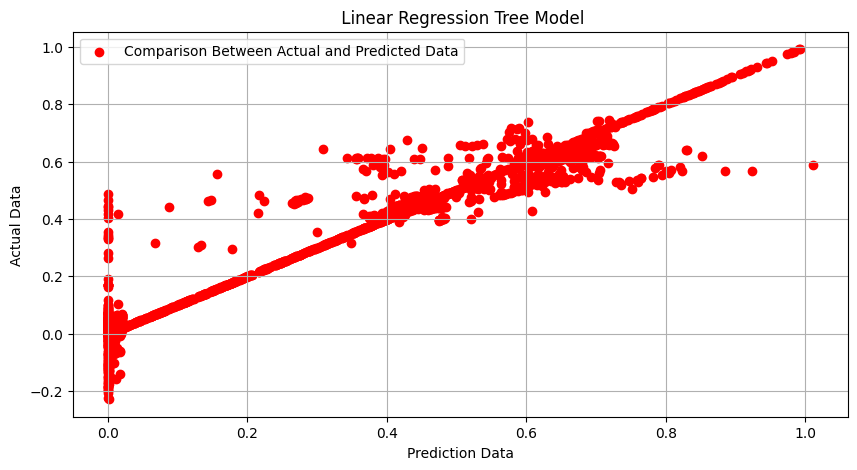

In [65]:
#Plot the comparison between  actual and predicted value
plt.figure(figsize = (10,5))
plt.scatter(Y_test_scaled, LR_new_pred, color = "red", label = "Comparison Between Actual and Predicted Data")
plt.legend()
plt.grid()
plt.title(" Linear Regression Tree Model")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()

In [66]:
# Classification for well time
def classify_well(model_output):

    annulus_press, cumulative_gas_diff = model_output

    if annulus_press < 100 or cumulative_gas_diff < 100:
        return 'NF'
    else:
        return 'GL'

# Reverse dummy encoding to get original well names
def get_well_names(x):
    well_columns = [col for col in x.columns if col.startswith('WELL_NAME_')]
    well_names = []

    for idx, row in x.iterrows():
        for col in well_columns:
            if row[col] == 1:
                well_name = col.replace('WELL_NAME_', '')
                well_names.append(well_name)
                break
        else:
            well_names.append('NONE')  # Fallback to NONE if no match

    return well_names

# Main prediction and classification process
def predict_and_classify(LookupError_new, X_test, X_Scaler, Y_Scaler):
    # Scale test data
    X_test_scaled = X_Scaler.transform(X_test)

    # Get predictions and reverse scaling
    predictions_scaled = LR_new.predict(X_test_scaled)
    predictions = Y_Scaler.inverse_transform(predictions_scaled)

    # Create DataFrame with predictions and well names
    well_names = get_well_names(X_test)
    pred_df = pd.DataFrame({
        'Well_Name': well_names,
        'ANNULUS_PRESS': predictions[:, 0],  # Annulus pressure
        'cumulative_gas_diff': predictions[:, 1]  # Cumulative gas difference
    })

    # Aggregate by Well_Name: max for both ANNULUS_PRESS and cumulative_gas_diff
    agg_df = pred_df.groupby('Well_Name').agg({
        'ANNULUS_PRESS': 'max',
        'cumulative_gas_diff': 'max'
    }).reset_index()

    # Ensure exactly 20 wells
    if len(agg_df) != 20:
        print(f"Warning: Found {len(agg_df)} wells instead of 20. Adjust input data if needed.")

    # Classify each well
    results = []
    for _, row in agg_df.iterrows():
        well_name = row['Well_Name']
        max_annulus_press = row['ANNULUS_PRESS']
        max_gas_diff = row['cumulative_gas_diff']

        well_type = classify_well([max_annulus_press, max_gas_diff])

        results.append({
            'Well_Name': well_name,
            'Well_Type': well_type
        })

    # Create final DataFrame
    result_df = pd.DataFrame(results)

    # Sort wells in numerical order (Well_#1, Well_#2, ..., Well_#20)
    result_df['Well_Number'] = result_df['Well_Name'].str.extract(r'Well_#(\d+)').astype(int)
    result_df = result_df.sort_values('Well_Number').reset_index(drop=True).drop(columns='Well_Number')

    return result_df

# Process predictions (assuming Rf_new, X_test, X_Scaler, Y_Scaler are defined)
result_df = predict_and_classify(LR_new, X_test, X_Scaler, Y_Scaler)

# Output results
print("\nPrediction Results:")
print(result_df[['Well_Name', 'Well_Type']])

# Save to CSV
result_df[['Well_Name', 'Well_Type']].to_csv('well_type_predictions.csv', index=False)


Prediction Results:
   Well_Name Well_Type
0    Well_#1        GL
1    Well_#2        NF
2    Well_#3        GL
3    Well_#4        GL
4    Well_#5        NF
5    Well_#6        NF
6    Well_#7        GL
7    Well_#8        GL
8    Well_#9        GL
9   Well_#10        NF
10  Well_#11        GL
11  Well_#12        NF
12  Well_#13        NF
13  Well_#14        NF
14  Well_#15        NF
15  Well_#16        NF
16  Well_#17        GL
17  Well_#18        NF
18  Well_#19        NF
19  Well_#20        GL


In [67]:
#Train the model
Rf_new = RandomForestRegressor( max_depth = 20000, random_state=42)
Rf_new.fit(X_train_scaled, Y_train_scaled)

#make prediction
Rf_new_pred = Rf_new.predict(X_test_scaled)

#evaluate the model
r2 = r2_score(Y_test_scaled, Rf_new_pred)
rmse = root_mean_squared_error(Y_test_scaled, Rf_new_pred)
mae = mean_absolute_error(Y_test_scaled, Rf_new_pred)
print(f"R-squared (R²): {r2}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9964568392456177
 Root Mean Squared Error (RMSE): 0.014567351454544988
Mean Absolute Error (MAE): 0.0037490362178085055


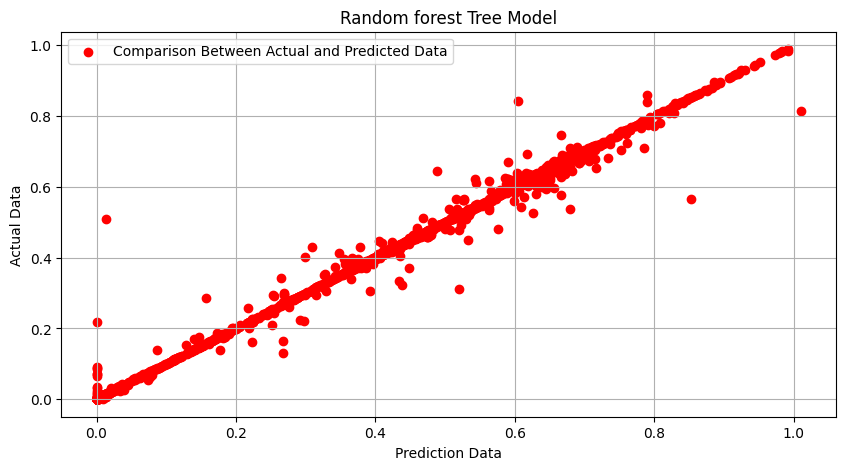

In [68]:
#Plot the comparison between  actual and predicted value
plt.figure(figsize = (10,5))
plt.scatter(Y_test_scaled, Rf_new_pred, color = "red", label = "Comparison Between Actual and Predicted Data")
plt.legend()
plt.grid()
plt.title("Random forest Tree Model")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()

In [69]:

# Classification function for a single well
def classify_well(model_output):
    annulus_press, cumulative_gas_diff = model_output

    if annulus_press < 100 or cumulative_gas_diff < 100:
        return 'NF'
    else:
        return 'GL'

# Reverse dummy encoding to get original well names
def get_well_names(x):
    well_columns = [col for col in x.columns if col.startswith('WELL_NAME_')]
    well_names = []

    for idx, row in x.iterrows():
        for col in well_columns:
            if row[col] == 1:
                well_name = col.replace('WELL_NAME_', '')
                well_names.append(well_name)
                break
        else:
            well_names.append('NONE')  # Fallback to NONE if no match

    return well_names

# Main prediction and classification process
def predict_and_classify(Rf_new, X_test, X_Scaler, Y_Scaler):
    # Scale test data
    X_test_scaled = X_Scaler.transform(X_test)

    # Get predictions and reverse scaling
    predictions_scaled = Rf_new.predict(X_test_scaled)
    predictions = Y_Scaler.inverse_transform(predictions_scaled)

    # Create DataFrame with predictions and well names
    well_names = get_well_names(X_test)
    pred_df = pd.DataFrame({
        'Well_Name': well_names,
        'ANNULUS_PRESS': predictions[:, 0],  # Annulus pressure
        'cumulative_gas_diff': predictions[:, 1]  # Cumulative gas difference
    })

    # Aggregate by Well_Name: max for both ANNULUS_PRESS and cumulative_gas_diff
    agg_df = pred_df.groupby('Well_Name').agg({
        'ANNULUS_PRESS': 'max',
        'cumulative_gas_diff': 'max'
    }).reset_index()

    # Ensure exactly 20 wells
    if len(agg_df) != 20:
        print(f"Warning: Found {len(agg_df)} wells instead of 20. Adjust input data if needed.")

    # Classify each well
    results = []
    for _, row in agg_df.iterrows():
        well_name = row['Well_Name']
        max_annulus_press = row['ANNULUS_PRESS']
        max_gas_diff = row['cumulative_gas_diff']

        well_type = classify_well([max_annulus_press, max_gas_diff])

        results.append({
            'Well_Name': well_name,
            'Well_Type': well_type
        })

    # Create final DataFrame
    result_df = pd.DataFrame(results)

    # Sort wells in numerical order (Well_#1, Well_#2, ..., Well_#20)
    result_df['Well_Number'] = result_df['Well_Name'].str.extract(r'Well_#(\d+)').astype(int)
    result_df = result_df.sort_values('Well_Number').reset_index(drop=True).drop(columns='Well_Number')

    return result_df

# Process predictions (assuming Rf_new, X_test, X_Scaler, Y_Scaler are defined)
result_df = predict_and_classify(Rf_new, X_test, X_Scaler, Y_Scaler)

# Output results
print("\nPrediction Results:")
print(result_df[['Well_Name', 'Well_Type']])

# Save to CSV
result_df[['Well_Name', 'Well_Type']].to_csv('well_type_predictions.csv', index=False)


Prediction Results:
   Well_Name Well_Type
0    Well_#1        GL
1    Well_#2        GL
2    Well_#3        GL
3    Well_#4        GL
4    Well_#5        NF
5    Well_#6        NF
6    Well_#7        GL
7    Well_#8        GL
8    Well_#9        GL
9   Well_#10        GL
10  Well_#11        GL
11  Well_#12        NF
12  Well_#13        NF
13  Well_#14        NF
14  Well_#15        NF
15  Well_#16        NF
16  Well_#17        GL
17  Well_#18        GL
18  Well_#19        NF
19  Well_#20        GL


# Model Overview for Production Type (Steady or Unsteady)

To classify wells as either steady or unsteady, we employ two time-series models,  Recurrent Neural Network (RNN) and Long Short-Term Memory (LSTM). The LSTM model is more robust due to its ability to capture long-term dependencies in sequential data. We predict cumulative oil production as the output and apply a logic-based approach to determine the stability status based on production trends over a three-month period.

After predicting cumulative oil production using the LSTM model, we reverse the scaled predictions to their original value. We then group the data by well and bin it into monthly intervals. To determine formation type  , we compare the median cumulative oil production from the first three months to the last three months. If the production declines by 50% or more, the well is classified as `unsteady`; otherwise, it is classified as `steady`.



In [70]:
df.columns

Index(['PROD_DATE', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
       'DOWNHOLE_TEMPERATURE (deg F)', 'ANNULUS_PRESS (PSI)', 'CHOKE_SIZE (%)',
       'WELL_HEAD_PRESSURE (PSI)', 'WELL_HEAD_TEMPERATURE (deg F)',
       'CUMULATIVE_OIL_PROD (STB)', 'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)', 'CUMULATIVE_WATER_PROD (BBL)',
       'days_elapsed', 'GOR (MSCF/STB)', 'WATER_CUT (%)', 'WELL_NAME_Well_#1',
       'WELL_NAME_Well_#10', 'WELL_NAME_Well_#11', 'WELL_NAME_Well_#12',
       'WELL_NAME_Well_#13', 'WELL_NAME_Well_#14', 'WELL_NAME_Well_#15',
       'WELL_NAME_Well_#16', 'WELL_NAME_Well_#17', 'WELL_NAME_Well_#18',
       'WELL_NAME_Well_#19', 'WELL_NAME_Well_#2', 'WELL_NAME_Well_#20',
       'WELL_NAME_Well_#3', 'WELL_NAME_Well_#4', 'WELL_NAME_Well_#5',
       'WELL_NAME_Well_#6', 'WELL_NAME_Well_#7', 'WELL_NAME_Well_#8',
       'WELL_NAME_Well_#9', 'cumulative_gas_diff'],
      dtype='object')

In [71]:
input_columns_s = [
       'ON_STREAM_HRS',
       'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
       'DOWNHOLE_TEMPERATURE (deg F)',
       'ANNULUS_PRESS (PSI)',
       'CHOKE_SIZE (%)',
       'WELL_HEAD_PRESSURE (PSI)',
       'WELL_HEAD_TEMPERATURE (deg F)',
       'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)',
       'CUMULATIVE_WATER_PROD (BBL)',
       'days_elapsed',
       'GOR (MSCF/STB)',
       'WATER_CUT (%)',
       'WELL_NAME_Well_#1',
       'WELL_NAME_Well_#10',
       'WELL_NAME_Well_#11',
       'WELL_NAME_Well_#12',
       'WELL_NAME_Well_#13',
       'WELL_NAME_Well_#14',
       'WELL_NAME_Well_#15',
       'WELL_NAME_Well_#16',
       'WELL_NAME_Well_#17',
       'WELL_NAME_Well_#18',
       'WELL_NAME_Well_#19',
       'WELL_NAME_Well_#2',
       'WELL_NAME_Well_#20',
       'WELL_NAME_Well_#3',
       'WELL_NAME_Well_#4',
       'WELL_NAME_Well_#5',
       'WELL_NAME_Well_#6',
       'WELL_NAME_Well_#7',
       'WELL_NAME_Well_#8',
       'WELL_NAME_Well_#9',
]
output_columns_s = [
   'CUMULATIVE_OIL_PROD (STB)'
]
X_s = df[input_columns_s].values
Y_s = df[output_columns_s].values
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_s, Y_s, test_size=0.2, random_state=42)
scaler_X_s = MinMaxScaler()
X_train_scaled_2s = scaler_X_s.fit_transform(X_train_s)
X_test_scaled_2s = scaler_X_s.transform(X_test_s)

scaler_Y_s = MinMaxScaler()
Y_train_scaled_s = scaler_Y_s.fit_transform(Y_train_s)
Y_test_scaled_s = scaler_Y_s.transform(Y_test_s)

#  reshape to 3D for RNN
# add one timestep, shape becomes (samples, timesteps=1, features)
X_train_scaled_s = np.expand_dims(X_train_scaled_2s, axis=1)
X_test_scaled_s = np.expand_dims(X_test_scaled_2s, axis=1)




# Build the RNN model for single output  regression
rnn_model_s = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(X_train_scaled_s.shape[1], X_train_scaled_s.shape[2])),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)  # The output layer has as one neurons as output columns
])

rnn_model_s.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the RNN model
rnn_model_s.fit(X_train_scaled_s, Y_train_scaled_s, epochs=50, batch_size=32, validation_data=(X_test_scaled_s, Y_test_scaled_s))

#rnn_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Make predictions
Y_pred_s = rnn_model_s.predict(X_test_scaled_s)







Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0170 - mae: 0.0826 - val_loss: 3.3812e-04 - val_mae: 0.0143
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - mae: 0.0295 - val_loss: 1.9783e-04 - val_mae: 0.0107
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - mae: 0.0269 - val_loss: 3.7330e-04 - val_mae: 0.0148
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014 - mae: 0.0231 - val_loss: 8.5020e-04 - val_mae: 0.0198
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - mae: 0.0231 - val_loss: 2.4027e-04 - val_mae: 0.0114
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0013 - mae: 0.0232 - val_loss: 3.0549e-04 - val_mae: 0.0106
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mae: 0.0238 - val_loss: 8.9162e-05 - val_mae: 0.0071
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0012 - mae: 0.0219 - val_loss: 1.5063e-04 - val_mae: 0.0074
Epoch 9/50
199/199 ━━━━━

In [72]:

# Reshapes X_test_scaled from 3D to 2D by flattening the last two dimensions for model input compatibility.
X_train_scaled_2s = X_train_scaled_s.reshape((X_train_scaled_s.shape[0], X_train_scaled_s.shape[2]))

# Predict
Y_pred_scaled_s = rnn_model_s.predict(X_train_scaled_s)

# Inverse scale
Y_pred_s = scaler_Y_s.inverse_transform(Y_pred_scaled_s)

# TO Combine prediction back to X_test
df_result = pd.DataFrame(X_train_scaled_2s, columns=input_columns_s)
df_result['predicted_OIL_PROD'] = Y_pred_s
#scale day elapsed
scaler_days = MinMaxScaler()
scaler_days.fit(df[['days_elapsed']])
# Now use it to inverse the scaled days_elapsed
df_result['original_days_elapsed'] = scaler_days.inverse_transform(df_result[['days_elapsed']])

# Recover WELL_NAME from one-hot columns
well_columns = [col for col in df_result.columns if col.startswith('WELL_NAME_')]
df_result['WELL_NAME'] = df_result[well_columns].idxmax(axis=1).str.replace('WELL_NAME_', '')


original_days = scaler_days.inverse_transform(df_result[['days_elapsed']])
df_result['original_days_elapsed'] = original_days
df_result['month'] = (df_result['original_days_elapsed'] // 30).astype(int)


trend_list = []

for well, group in df_result.groupby('WELL_NAME'):
    group = group.sort_values('original_days_elapsed')

    # Get first and last 3-month median values
    first_month = group[group['month'] <= group['month'].min() + 2]
    last_month = group[group['month'] >= group['month'].max() - 2]

    start_val = first_month['predicted_OIL_PROD'].median()
    end_val = last_month['predicted_OIL_PROD'].median()

    # Avoid division by zero
    if start_val == 0:
        status = 'steady'
    else:
        drop_ratio = (start_val - end_val) / start_val

        if drop_ratio >= 0.5:
            status = 'unsteady'
        else:
            status = 'steady'

    trend_list.append({'WELL_NAME': well, 'watercut_status': status})

df_trend = pd.DataFrame(trend_list)

# Sort wells in numerical order
df_trend['Well_Number'] = df_trend['WELL_NAME'].str.extract(r'Well_#(\d+)').astype(int)
df_trend = df_trend.sort_values('Well_Number').reset_index(drop=True).drop(columns='Well_Number')

#print output
print(df_trend)

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   WELL_NAME watercut_status
0    Well_#1          steady
1    Well_#2          steady
2    Well_#3          steady
3    Well_#4          steady
4    Well_#5          steady
5    Well_#6        unsteady
6    Well_#7          steady
7    Well_#8          steady
8    Well_#9          steady
9   Well_#10          steady
10  Well_#11          steady
11  Well_#12          steady
12  Well_#13          steady
13  Well_#14          steady
14  Well_#15          steady
15  Well_#16          steady
16  Well_#17          steady
17  Well_#18          steady
18  Well_#19          steady
19  Well_#20          steady


In [73]:
lstm_model_S = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train_scaled_s.shape[1], X_train_scaled_s.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output features: WATER_CUT (%)
])

# Compile the model
lstm_model_S.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
lstm_model_S.fit(
    X_train_scaled_s, Y_train_scaled_s,
    validation_data=(X_test_scaled_s, Y_test_scaled_s),
    epochs=100,
    batch_size=32,
    verbose=2
)



Epoch 1/100
199/199 - 5s - 23ms/step - loss: 0.0084 - mae: 0.0533 - val_loss: 2.7348e-04 - val_mae: 0.0131
Epoch 2/100
199/199 - 1s - 4ms/step - loss: 7.4156e-04 - mae: 0.0200 - val_loss: 1.3393e-04 - val_mae: 0.0085
Epoch 3/100
199/199 - 1s - 4ms/step - loss: 5.1430e-04 - mae: 0.0164 - val_loss: 1.2987e-04 - val_mae: 0.0078
Epoch 4/100
199/199 - 1s - 6ms/step - loss: 3.8752e-04 - mae: 0.0139 - val_loss: 8.0885e-05 - val_mae: 0.0060
Epoch 5/100
199/199 - 1s - 4ms/step - loss: 3.0702e-04 - mae: 0.0125 - val_loss: 4.6795e-05 - val_mae: 0.0049
Epoch 6/100
199/199 - 1s - 6ms/step - loss: 2.4890e-04 - mae: 0.0111 - val_loss: 1.0692e-04 - val_mae: 0.0082
Epoch 7/100
199/199 - 1s - 4ms/step - loss: 2.4038e-04 - mae: 0.0109 - val_loss: 1.3203e-04 - val_mae: 0.0082
Epoch 8/100
199/199 - 1s - 7ms/step - loss: 2.0877e-04 - mae: 0.0101 - val_loss: 2.8773e-05 - val_mae: 0.0040
Epoch 9/100
199/199 - 1s - 7ms/step - loss: 1.8001e-04 - mae: 0.0093 - val_loss: 1.6812e-04 - val_mae: 0.0085
Epoch 10/100


In [74]:
lstm_pred_s = lstm_model_S.predict(X_test_scaled_s)
#evaluate the model
r2 = r2_score(Y_test_scaled_s, lstm_pred_s)
rmse = root_mean_squared_error(Y_test_scaled_s, lstm_pred_s)
mae = mean_absolute_error(Y_test_scaled_s, lstm_pred_s)

print(f"R-squared (R²): {r2}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
R-squared (R²): 0.9890627697906411
 Root Mean Squared Error (RMSE): 0.01628716689971081
Mean Absolute Error (MAE): 0.009499580024411853


In [75]:
# Reshapes X_test_scaled from 3D to 2D by flattening the last two dimensions for model input compatibility.
X_train_scaled_2s = X_train_scaled_s.reshape((X_train_scaled_s.shape[0], X_train_scaled_s.shape[2]))

# Predict
lstm_pred_scaled_s = lstm_model_S.predict(X_train_scaled_s)

# Inverse scale
lstm_pred_s = scaler_Y_s.inverse_transform(lstm_pred_scaled_s)

# TO Combine prediction back to X_test
df_result = pd.DataFrame(X_train_scaled_2s, columns=input_columns_s)
df_result['predicted_OIL_PROD'] = lstm_pred_s
#scale day elapsed
scaler_days = MinMaxScaler()
scaler_days.fit(df[['days_elapsed']])
# Now use it to inverse the scaled days_elapsed
df_result['original_days_elapsed'] = scaler_days.inverse_transform(df_result[['days_elapsed']])

# Recover WELL_NAME from one-hot columns
well_columns = [col for col in df_result.columns if col.startswith('WELL_NAME_')]
df_result['WELL_NAME'] = df_result[well_columns].idxmax(axis=1).str.replace('WELL_NAME_', '')


original_days = scaler_days.inverse_transform(df_result[['days_elapsed']])
df_result['original_days_elapsed'] = original_days
df_result['month'] = (df_result['original_days_elapsed'] // 30).astype(int)


trend_list = []

for well, group in df_result.groupby('WELL_NAME'):
    group = group.sort_values('original_days_elapsed')

    # Get first and last 3-month median values
    first_month = group[group['month'] <= group['month'].min() + 2]
    last_month = group[group['month'] >= group['month'].max() - 2]

    start_val = first_month['predicted_OIL_PROD'].median()
    end_val = last_month['predicted_OIL_PROD'].median()

    # Avoid division by zero
    if start_val == 0:
        status = 'steady'
    else:
        drop_ratio = (start_val - end_val) / start_val

        if drop_ratio >= 0.5:
            status = 'unsteady'
        else:
            status = 'steady'

    trend_list.append({'WELL_NAME': well, 'watercut_status': status})

df_trend = pd.DataFrame(trend_list)

# Sort wells in numerical order
df_trend['Well_Number'] = df_trend['WELL_NAME'].str.extract(r'Well_#(\d+)').astype(int)
df_trend = df_trend.sort_values('Well_Number').reset_index(drop=True).drop(columns='Well_Number')

#print output
print(df_trend)

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
   WELL_NAME watercut_status
0    Well_#1          steady
1    Well_#2          steady
2    Well_#3          steady
3    Well_#4          steady
4    Well_#5          steady
5    Well_#6        unsteady
6    Well_#7          steady
7    Well_#8          steady
8    Well_#9          steady
9   Well_#10          steady
10  Well_#11          steady
11  Well_#12          steady
12  Well_#13          steady
13  Well_#14          steady
14  Well_#15          steady
15  Well_#16          steady
16  Well_#17          steady
17  Well_#18          steady
18  Well_#19          steady
19  Well_#20          steady


# Model Overview for Water Cut Trend Classification

To analyze the water cut trend over time, which is inherently time dependent, we employ two time series models,  Recurrent Neural Network (RNN) and Long Short-Term Memory (LSTM). The LSTM model proves to be the more robust choice due to its ability to capture long-term dependencies in sequential data. We use water cut as the output for these models and apply a logic based approach to classify the trend over a one month period as flat, increasing (`incr`), decreasing (`decr`), or combined (`combo`).

After predicting water cut using the LSTM model, we reverse the scaled predictions to their original value. We then group the data by well and month, aggregating the predicted water cut values. The trend is determined by analyzing the month-to-month differences in water cut, if all differences are zero, the trend is `flat`; if all are positive, it is `incr`; if all are negative, it is `decr`; otherwise, it is `combo`.

This logic-based classification post  prediction is used because directly predicting trends with a machine learning model requires extensive data and complex iterative processes. The hybrid approach combining robust LSTM predictions with deterministic logic ensures accurate and efficient classification of water cut trends over time.

In [76]:

# Select input and output features
input_columns_w = [
       'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
       'DOWNHOLE_TEMPERATURE (deg F)',
       'ANNULUS_PRESS (PSI)',
       'CHOKE_SIZE (%)',
       'WELL_HEAD_PRESSURE (PSI)',
       'WELL_HEAD_TEMPERATURE (deg F)',
       'CUMULATIVE_OIL_PROD (STB)',
       'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)',
       'days_elapsed',
       'GOR (MSCF/STB)',
       'WELL_NAME_Well_#1',
       'WELL_NAME_Well_#10',
       'WELL_NAME_Well_#11',
       'WELL_NAME_Well_#12',
       'WELL_NAME_Well_#13',
       'WELL_NAME_Well_#14',
       'WELL_NAME_Well_#15',
       'WELL_NAME_Well_#16',
       'WELL_NAME_Well_#17',
       'WELL_NAME_Well_#18',
       'WELL_NAME_Well_#19',
       'WELL_NAME_Well_#2',
       'WELL_NAME_Well_#20',
       'WELL_NAME_Well_#3',
       'WELL_NAME_Well_#4',
       'WELL_NAME_Well_#5',
       'WELL_NAME_Well_#6',
       'WELL_NAME_Well_#7',
       'WELL_NAME_Well_#8',
       'WELL_NAME_Well_#9',
]
output_columns_w = [
   'WATER_CUT (%)'
]



In [77]:
X_w= df[input_columns_w].values
Y_w = df[output_columns_w].values
X_train_w, X_test_w, Y_train_w, Y_test_w = train_test_split(X_w, Y_w, test_size=0.2, random_state=42)
scaler_X = MinMaxScaler()
X_train_scaled_2d = scaler_X.fit_transform(X_train_w)
X_test_scaled_2d = scaler_X.transform(X_test_w)

scaler_Y = MinMaxScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train_w)
Y_test_scaled = scaler_Y.transform(Y_test_w)

#  reshape to 3D for RNN
# e.g., add one timestep: shape becomes (samples, timesteps=1, features)
X_train_scaled = np.expand_dims(X_train_scaled_2d, axis=1)
X_test_scaled = np.expand_dims(X_test_scaled_2d, axis=1)




In [79]:
# Build the RNN model for single output regression
rnn_model_w = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)  # The output layer has one output
])

rnn_model_w.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the RNN model
rnn_model_w.fit(X_train_scaled, Y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test_scaled))

# Make predictions
Y_rnn_pred = rnn_model_w.predict(X_test_scaled)

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0565 - mae: 0.1678 - val_loss: 0.0021 - val_mae: 0.0356
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0103 - mae: 0.0720 - val_loss: 0.0018 - val_mae: 0.0331
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0078 - mae: 0.0626 - val_loss: 7.0864e-04 - val_mae: 0.0207
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mae: 0.0579 - val_loss: 0.0014 - val_mae: 0.0316
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0059 - mae: 0.0539 - val_loss: 3.9312e-04 - val_mae: 0.0140
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0050 - mae: 0.0489 - val_loss: 0.0012 - val_mae: 0.0265
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0045 - mae: 0.0474 - val_loss: 8.2860e-04 - val_mae: 0.0233
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0039 - mae: 0.0445 - val_loss: 3.7143e-04 - val_mae: 0.0143
Epoch 9/50
199/199 ━━━━━━━━━━━━━━━━━━

In [80]:
Y_rnn_pred = rnn_model_w.predict(X_test_scaled)
#evaluate the model
r2 = r2_score(Y_test_scaled, Y_rnn_pred)
rmse = root_mean_squared_error(Y_test_scaled, Y_rnn_pred)
mae = mean_absolute_error(Y_test_scaled, Y_rnn_pred)

print(f"R-squared (R²): {r2}")
print(f" Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R-squared (R²): 0.9970836017632128
 Root Mean Squared Error (RMSE): 0.015882601372998274
Mean Absolute Error (MAE): 0.011605429927733005


In [82]:
# Reshapes X_test_scaled from 3D to 2D by flattening the last two dimensions for model input compatibility.
X_train_scaled_2d = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[2]))

# predict
y_pred_scaled = rnn_model_w.predict(X_train_scaled)

#  Inverse scale
y_pred_rnn = scaler_Y.inverse_transform(y_pred_scaled)

# TO  Make sure X_test is a DataFrame with correct column names
df_result = pd.DataFrame(X_train_scaled_2d, columns=input_columns_w)
df_result['predicted_watercut'] = y_pred_rnn

#  Recover WELL_NAME from one-hot columns
well_columns = [col for col in df_result.columns if col.startswith('WELL_NAME_')]
df_result['WELL_NAME'] = df_result[well_columns].idxmax(axis=1).str.replace('WELL_NAME_', '')

# scaled day elasped and bring back for accurate input and comvert the coulumns in month format
scaler_days = MinMaxScaler()
scaler_days.fit(df[['days_elapsed']])
original_days = scaler_days.inverse_transform(df_result[['days_elapsed']])
df_result['original_days_elapsed'] = original_days
df_result['month'] = (df_result['original_days_elapsed'] // 30).astype(int)

trend_list = []

for well, group in df_result.groupby('WELL_NAME'):
    # Sort by time
    group = group.sort_values('days_elapsed')

    #  mean predicted watercut per month bin
    monthly = group.groupby('month')['predicted_watercut'].median().reset_index()

    # Compute month-to-month difference
    monthly['diff'] = monthly['predicted_watercut'].diff()

    # Apply trend logic
    if (monthly['diff'].dropna() == 0).all():
        trend = 'flat'
    elif (monthly['diff'].dropna() > 0).all():
        trend = 'incr'
    elif (monthly['diff'].dropna() < 0).all():
        trend = 'decr'
    else:
        trend = 'combo'

    trend_list.append({'WELL_NAME': well, 'watercut_trend': trend})

df_trend = pd.DataFrame(trend_list)

# print the output
print(df_trend)


199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
   WELL_NAME watercut_trend
0    Well_#1           incr
1   Well_#10          combo
2   Well_#11          combo
3   Well_#12          combo
4   Well_#13          combo
5   Well_#14           incr
6   Well_#15           incr
7   Well_#16           incr
8   Well_#17          combo
9   Well_#18           incr
10  Well_#19           incr
11   Well_#2           incr
12  Well_#20           incr
13   Well_#3           incr
14   Well_#4          combo
15   Well_#5           incr
16   Well_#6          combo
17   Well_#7           incr
18   Well_#8           incr
19   Well_#9           incr


In [46]:
lstm_model_w = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output features: WATER_CUT (%)
])

# Compile the model
lstm_model_w.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
lstm_model_w.fit(
    X_train_scaled, Y_train_scaled,
    validation_data=(X_test_scaled, Y_test_scaled),
    epochs=100,
    batch_size=32,
    verbose=2
)




Epoch 1/100
199/199 - 13s - 67ms/step - loss: 0.0428 - mae: 0.1343 - val_loss: 0.0030 - val_mae: 0.0376
Epoch 2/100
199/199 - 1s - 7ms/step - loss: 0.0037 - mae: 0.0433 - val_loss: 9.9196e-04 - val_mae: 0.0225
Epoch 3/100
199/199 - 2s - 12ms/step - loss: 0.0019 - mae: 0.0313 - val_loss: 6.9593e-04 - val_mae: 0.0190
Epoch 4/100
199/199 - 3s - 14ms/step - loss: 0.0014 - mae: 0.0255 - val_loss: 4.1138e-04 - val_mae: 0.0139
Epoch 5/100
199/199 - 3s - 13ms/step - loss: 0.0011 - mae: 0.0224 - val_loss: 2.8914e-04 - val_mae: 0.0116
Epoch 6/100
199/199 - 3s - 14ms/step - loss: 9.7797e-04 - mae: 0.0210 - val_loss: 2.0473e-04 - val_mae: 0.0094
Epoch 7/100
199/199 - 2s - 12ms/step - loss: 7.5914e-04 - mae: 0.0185 - val_loss: 2.4063e-04 - val_mae: 0.0102
Epoch 8/100
199/199 - 3s - 13ms/step - loss: 7.4204e-04 - mae: 0.0181 - val_loss: 3.9664e-04 - val_mae: 0.0138
Epoch 9/100
199/199 - 2s - 8ms/step - loss: 6.4334e-04 - mae: 0.0168 - val_loss: 2.9535e-04 - val_mae: 0.0139
Epoch 10/100
199/199 - 2s 

In [47]:
# Reshapes X_test_scaled from 3D to 2D by flattening the last two dimensions for model input compatibility.
X_train_scaled_2d = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[2]))

# predict
y_pred_scaled = lstm_model_w.predict(X_train_scaled)

#  Inverse scale
y_pred_lstm = scaler_Y.inverse_transform(y_pred_scaled)

# TO  Make sure X_test is a DataFrame with correct column names
df_result = pd.DataFrame(X_train_scaled_2d, columns=input_columns)
df_result['predicted_watercut'] = y_pred_lstm

#  Recover WELL_NAME from one-hot columns
well_columns = [col for col in df_result.columns if col.startswith('WELL_NAME_')]
df_result['WELL_NAME'] = df_result[well_columns].idxmax(axis=1).str.replace('WELL_NAME_', '')

# scaled day elasped and bring back for accurate input and comvert the coulumns in month format
scaler_days = MinMaxScaler()
scaler_days.fit(df[['days_elapsed']])
original_days = scaler_days.inverse_transform(df_result[['days_elapsed']])
df_result['original_days_elapsed'] = original_days
df_result['month'] = (df_result['original_days_elapsed'] // 30).astype(int)

trend_list = []

for well, group in df_result.groupby('WELL_NAME'):
    # Sort by time
    group = group.sort_values('days_elapsed')

    #  mean predicted watercut per month bin
    monthly = group.groupby('month')['predicted_watercut'].median().reset_index()

    # Compute month-to-month difference
    monthly['diff'] = monthly['predicted_watercut'].diff()

    # Apply trend logic
    if (monthly['diff'].dropna() == 0).all():
        trend = 'flat'
    elif (monthly['diff'].dropna() > 0).all():
        trend = 'incr'
    elif (monthly['diff'].dropna() < 0).all():
        trend = 'decr'
    else:
        trend = 'combo'

    trend_list.append({'WELL_NAME': well, 'watercut_trend': trend})

df_trend = pd.DataFrame(trend_list)

# print the output
print(df_trend)

199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
   WELL_NAME watercut_trend
0    Well_#1           incr
1   Well_#10          combo
2   Well_#11           incr
3   Well_#12          combo
4   Well_#13          combo
5   Well_#14           incr
6   Well_#15           incr
7   Well_#16           incr
8   Well_#17          combo
9   Well_#18           incr
10  Well_#19           incr
11   Well_#2           incr
12  Well_#20           incr
13   Well_#3           incr
14   Well_#4          combo
15   Well_#5           incr
16   Well_#6          combo
17   Well_#7           incr
18   Well_#8           incr
19   Well_#9           incr


In [83]:

#load the dataset
df_new = pd.read_csv('/content/sample_data/spe_africa_dseats_datathon_2025_wells_dataset.csv', encoding='utf-8')

In [84]:
# convert to date time
df_new['PROD_DATE'] = pd.to_datetime(df_new['PROD_DATE'].astype(str), errors='coerce', dayfirst=True)


# Model Overview for Productivity Index Trend Classification

To classify the productivity index trend over time, which is time dependent, we employ two time series models, Recurrent Neural Network (RNN) and Long Short-Term Memory (LSTM). The LSTM model is more robust due to its ability to capture long-term dependencies in sequential data. We predict the productivity index, calculated as the oil flow rate divided by the difference between the current average reservoir pressure and the bottomhole flowing pressure, and apply a logic based approach to classify the trend over a one-month period as flat, increasing (`incr`), decreasing (`decr`), or combined (`combo`).



In [85]:
df_new['days_elapsed'] = df_new.groupby('WELL_NAME')['PROD_DATE'].transform(lambda x: (x - x.min()).dt.days)

In [86]:
for col in ['BOTTOMHOLE_FLOWING_PRESSURE (PSI)','ANNULUS_PRESS (PSI)','WELL_HEAD_PRESSURE (PSI)',
            'CUMULATIVE_OIL_PROD (STB)','CUMULATIVE_FORMATION_GAS_PROD (MSCF)','CUMULATIVE_TOTAL_GAS_PROD (MSCF)','CUMULATIVE_WATER_PROD (BBL)']:
    df_new[col] = df_new[col].str.replace(',', '').astype(float)

In [87]:
# Define the mapping of wells to reservoirs  by assume an additional of 200psi to each maximum bottom hole pressure   each well
well_to_reservoir = {
    'Well_#1': 'JANI',
    'Well_#2': 'KEMA',
    'Well_#3': 'ACHI',
    'Well_#4': 'DEPU',
    'Well_#5': 'MAKO',
    'Well_#6': 'KEMA',
    'Well_#7': 'KEMA',
    'Well_#8': 'DEPU',
    'Well_#9': 'DEPU',
    'Well_#10': 'JANI',
    'Well_#11': 'DEPU',
    'Well_#12': 'ACHI',
    'Well_#13': 'ACHI',
    'Well_#14': 'MAKO',
    'Well_#15': 'JANI',
    'Well_#16': 'KEMA',
    'Well_#17': 'DEPU',
    'Well_#18': 'ACHI',
    'Well_#19': 'JANI',
    'Well_#20': 'DEPU'
}

# start  mapping
df_new['RESERVOIR'] = df_new['WELL_NAME'].map(well_to_reservoir)


In [88]:
reservoir_info = pd.DataFrame({
    'RESERVOIR': ['ACHI', 'KEMA', 'MAKO', 'DEPU', 'JANI'],
    'INITIAL_PRESSURE': [3500, 4200, 3500, 2800, 4500],
    'BUBBLE_POINT': [3300, 4000, 3500, 2800, 4300],
    'CURRENT_AVG_PRESSURE': [2700, 3900, 3000, 2400, 4200],
    'Initial_SOLUTION_GOR': [800, 600, 500, 1200, 1000],
    'FORMATION_VOL_FACTOR': [1.2, 1.45, 1.15, 1.37, 1.3]
})


In [89]:
#merge reservoir info
df_new = df_new.merge(reservoir_info, on='RESERVOIR', how='left')

TO Calculate the total reservoir barrels of oil produced from each reservoir we used the below computation

In [90]:

# Group by WELL_NAME to get the maximum CUMULATIVE_OIL_PROD per well
well_max_oil = df_new.groupby('WELL_NAME')['CUMULATIVE_OIL_PROD (STB)'].max().reset_index()


# Get the RESERVOIR for each WELL_NAME
well_reservoir = df_new[['WELL_NAME', 'RESERVOIR']].drop_duplicates().set_index('WELL_NAME')

# Join the max oil production with reservoir information
well_max_oil = well_max_oil.join(well_reservoir, on='WELL_NAME')

# Group by RESERVOIR and sum the CUMULATIVE_OIL_PROD to get total oil production
total_oil_per_reservoir = well_max_oil.groupby('RESERVOIR')['CUMULATIVE_OIL_PROD (STB)'].sum().reset_index()

# Print the results
print("\nTotal Oil Production per Reservoir (STB):")
print(total_oil_per_reservoir)



Total Oil Production per Reservoir (STB):
  RESERVOIR  CUMULATIVE_OIL_PROD (STB)
0      ACHI                  1072915.0
1      DEPU                  1877340.0
2      JANI                   457241.0
3      KEMA                  1860889.0
4      MAKO                   370351.0


In [91]:
#create new column for oil productivity index
df_new['oil_prod_index (stb/day/psi)'] = df_new['CUMULATIVE_OIL_PROD (STB)'] /(df_new['CURRENT_AVG_PRESSURE'] - df_new['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'])

In [92]:
# handle any object to numeric
df_new['oil_prod_index (stb/day/psi)'] = df_new['oil_prod_index (stb/day/psi)'].replace([np.inf, -np.inf, np.nan], 0)

In [93]:
# Display Dataframe
df_new

PROD_DATE WELL_NAME  ON_STREAM_HRS  BOTTOMHOLE_FLOWING_PRESSURE (PSI)  \
0    2014-02-15   Well_#1           0.00                             4050.0   
1    2014-02-16   Well_#1           0.00                             3961.0   
2    2014-02-17   Well_#1           0.00                             3961.0   
3    2014-02-18   Well_#1           0.00                             3964.0   
4    2014-02-19   Well_#1           0.00                             3965.0   
...         ...       ...            ...                                ...   
7950 2015-04-05  Well_#20          18.94                             2505.0   
7951 2015-04-06  Well_#20          21.06                             2503.0   
7952 2015-04-07  Well_#20          24.00                             2481.0   
7953 2015-04-08  Well_#20          15.94                             2485.0   
7954 2015-04-09  Well_#20          18.06                             2510.0   

      DOWNHOLE_TEMPERATURE (deg F)  ANNULUS_PRESS (PSI)  CHOKE_SIZE (%)  \
0                          189.866                0.000         1.17951   
1                          189.945                0.000         2.99440   
2                          190.004                0.000         1.90349   
3                          190.020                0.000         0.00000   
4                          190.107                0.000        30.20760   
...                            ...                  ...             ...   
7950                       149.177              633.188        77.32078   
7951                       149.169              617.591        72.40304   
7952                       149.175              645.435       100.00000   
7953                       149.178              651.282        76.40842   
7954                       149.139              593.181        56.67801   

      WELL_HEAD_PRESSURE (PSI)  WELL_HEAD_TEMPERATURE (deg F)  \
0                      482.460                         50.864   
1                      328.601                         47.668   
2                      387.218                         48.962   
3                      308.980                         46.636   
4                      196.057                         47.297   
...                        ...                            ...   
7950                   115.406                         85.532   
7951                   116.285                         84.959   
7952                   111.943                         87.361   
7953                   111.962                         87.583   
7954                   117.299                         82.390   

      CUMULATIVE_OIL_PROD (STB)  ...  CUMULATIVE_TOTAL_GAS_PROD (MSCF)  \
0                           0.0  ...                               0.0   
1                           0.0  ...                               0.0   
2                           0.0  ...                               0.0   
3                           0.0  ...                               0.0   
4                           0.0  ...                               0.0   
...                         ...  ...                               ...   
7950                   497425.0  ...                          352697.0   
7951                   497609.0  ...                          352808.0   
7952                   497879.0  ...                          352971.0   
7953                   498019.0  ...                          353055.0   
7954                   498126.0  ...                          353124.0   

      CUMULATIVE_WATER_PROD (BBL)  days_elapsed  RESERVOIR INITIAL_PRESSURE  \
0                             0.0             0       JANI             4500   
1                             0.0             1       JANI             4500   
2                             0.0             2       JANI             4500   
3                             0.0             3       JANI             4500   
4                             0.0             4       JANI             4500   
...         

In [13]:
# Display columns
df_new.columns

Index(['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS',
       'BOTTOMHOLE_FLOWING_PRESSURE (PSI)', 'DOWNHOLE_TEMPERATURE (deg F)',
       'ANNULUS_PRESS (PSI)', 'CHOKE_SIZE (%)', 'WELL_HEAD_PRESSURE (PSI)',
       'WELL_HEAD_TEMPERATURE (deg F)', 'CUMULATIVE_OIL_PROD (STB)',
       'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)', 'CUMULATIVE_WATER_PROD (BBL)',
       'days_elapsed', 'RESERVOIR', 'INITIAL_PRESSURE', 'BUBBLE_POINT',
       'CURRENT_AVG_PRESSURE', 'Initial_SOLUTION_GOR', 'FORMATION_VOL_FACTOR',
       'oil_prod_index (stb/day/psi)'],
      dtype='object')

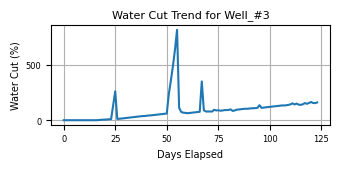

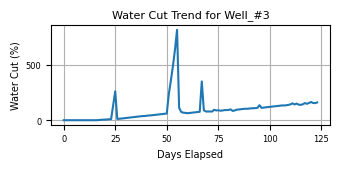

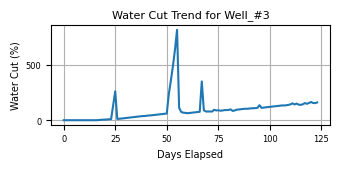

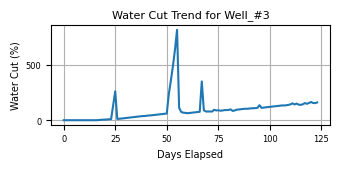

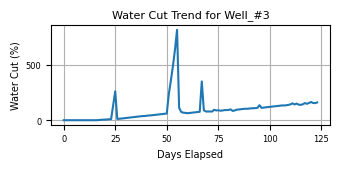

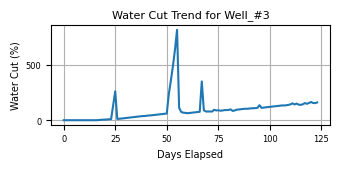

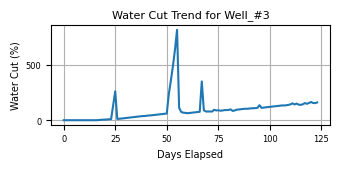

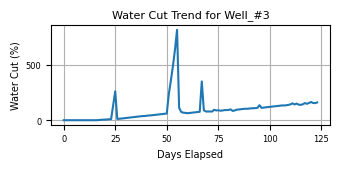

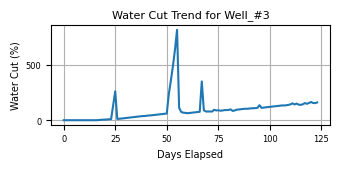

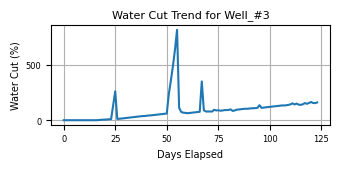

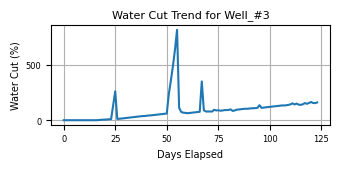

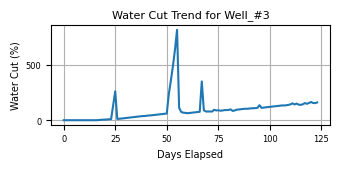

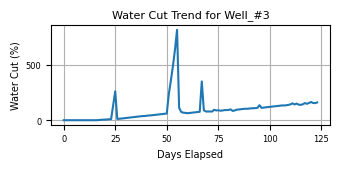

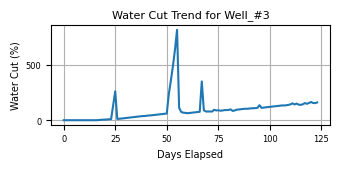

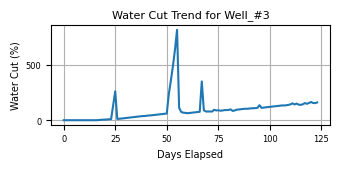

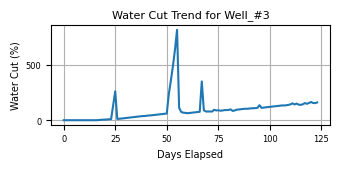

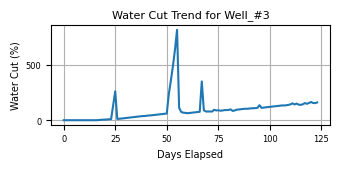

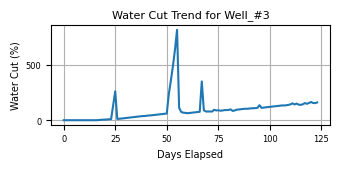

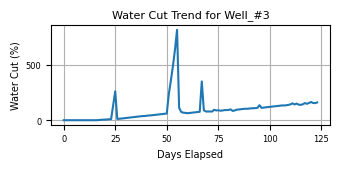

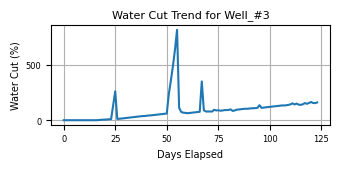

In [62]:
# visualize the Productivity Index trend

sample_well = df_new['WELL_NAME'].unique()[2]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[1]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[2]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[3]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[4]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[5]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[6]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()


ample_well = df_new['WELL_NAME'].unique()[7]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[8]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[9]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[10]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[11]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[12]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[13]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[14]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[15]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[16]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[17]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[18]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

ample_well = df_new['WELL_NAME'].unique()[19]

# Filter and plot
df_sample = df_new[df_new['WELL_NAME'] == sample_well]

# Smaller figure size: 4 inches wide, 2 inches tall
plt.figure(figsize=(3.5, 1.8))

plt.plot(df_sample['days_elapsed'], df_sample['oil_prod_index (stb/day/psi)'])
plt.title(f"Water Cut Trend for {sample_well}", fontsize=8)
plt.xlabel("Days Elapsed", fontsize=7)
plt.ylabel("Water Cut (%)", fontsize=7)
plt.grid(True)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

In [94]:
# Apply one hot encoding
df_new =pd.get_dummies(df_new, columns=['WELL_NAME'])

In [95]:
df_new.columns

Index(['PROD_DATE', 'ON_STREAM_HRS', 'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
       'DOWNHOLE_TEMPERATURE (deg F)', 'ANNULUS_PRESS (PSI)', 'CHOKE_SIZE (%)',
       'WELL_HEAD_PRESSURE (PSI)', 'WELL_HEAD_TEMPERATURE (deg F)',
       'CUMULATIVE_OIL_PROD (STB)', 'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)', 'CUMULATIVE_WATER_PROD (BBL)',
       'days_elapsed', 'RESERVOIR', 'INITIAL_PRESSURE', 'BUBBLE_POINT',
       'CURRENT_AVG_PRESSURE', 'Initial_SOLUTION_GOR', 'FORMATION_VOL_FACTOR',
       'oil_prod_index (stb/day/psi)', 'WELL_NAME_Well_#1',
       'WELL_NAME_Well_#10', 'WELL_NAME_Well_#11', 'WELL_NAME_Well_#12',
       'WELL_NAME_Well_#13', 'WELL_NAME_Well_#14', 'WELL_NAME_Well_#15',
       'WELL_NAME_Well_#16', 'WELL_NAME_Well_#17', 'WELL_NAME_Well_#18',
       'WELL_NAME_Well_#19', 'WELL_NAME_Well_#2', 'WELL_NAME_Well_#20',
       'WELL_NAME_Well_#3', 'WELL_NAME_Well_#4', 'WELL_NAME_Well_#5',
       'WELL_NAME_Well_#6', 'WELL_NAME_Well_#7', 'WELL_N

In [96]:
# Select input and output features
input_columns = [
       'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
       'DOWNHOLE_TEMPERATURE (deg F)',
       'CHOKE_SIZE (%)',
       'WELL_HEAD_PRESSURE (PSI)',
       'WELL_HEAD_TEMPERATURE (deg F)',
       'CUMULATIVE_OIL_PROD (STB)',
       'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)',
       'CUMULATIVE_WATER_PROD (BBL)',
       'days_elapsed',
       'WELL_NAME_Well_#1',
       'WELL_NAME_Well_#10',
       'WELL_NAME_Well_#11',
       'WELL_NAME_Well_#12',
       'WELL_NAME_Well_#13',
       'WELL_NAME_Well_#14',
       'WELL_NAME_Well_#15',
       'WELL_NAME_Well_#16',
       'WELL_NAME_Well_#17',
       'WELL_NAME_Well_#18',
       'WELL_NAME_Well_#19',
       'WELL_NAME_Well_#2',
       'WELL_NAME_Well_#20',
       'WELL_NAME_Well_#3',
       'WELL_NAME_Well_#4',
       'WELL_NAME_Well_#5',
       'WELL_NAME_Well_#6',
       'WELL_NAME_Well_#7',
       'WELL_NAME_Well_#8',
       'WELL_NAME_Well_#9'
]
output_columns = [
   'oil_prod_index (stb/day/psi)',
]

In [97]:

X_i = df_new[input_columns].values
Y_i = df_new[output_columns].values
X_train_i, X_test_i, Y_train_i, Y_test_i = train_test_split(X_i, Y_i, test_size=0.2, random_state=42)
scaler_X = MinMaxScaler()
X_train_scaled_2i = scaler_X.fit_transform(X_train_i)
X_test_scaled_2i = scaler_X.transform(X_test_i)

scaler_Y = MinMaxScaler()
Y_train_scaled_i = scaler_Y.fit_transform(Y_train_i)
Y_test_scaled_i = scaler_Y.transform(Y_test_i)

# Step 2: reshape to 3D for RNN
# e.g., add one timestep: shape becomes (samples, timesteps=1, features)
X_train_scaled_i = np.expand_dims(X_train_scaled_2i, axis=1)
X_test_scaled_i = np.expand_dims(X_test_scaled_2i, axis=1)




# Build the RNN model for single output regression
rnn_model_i = Sequential([
    SimpleRNN(128, activation='relu', input_shape=(X_train_scaled_i.shape[1], X_train_scaled_i.shape[2])),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)  # The output layer has one output
])

rnn_model_i.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the RNN model
rnn_model_i.fit(X_train_scaled_i, Y_train_scaled_i, epochs=50, batch_size=32, validation_data=(X_test_scaled_i, Y_test_scaled_i))

#rnn_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))

# Make predictions
Y_rnn_pred = rnn_model_i.predict(X_test_scaled_i)


Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0968 - mae: 0.2231 - val_loss: 6.4237e-04 - val_mae: 0.0131
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0095 - mae: 0.0752 - val_loss: 9.0842e-04 - val_mae: 0.0225
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0079 - mae: 0.0687 - val_loss: 4.1773e-04 - val_mae: 0.0090
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063 - mae: 0.0612 - val_loss: 5.4597e-04 - val_mae: 0.0144
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0048 - mae: 0.0524 - val_loss: 4.6881e-04 - val_mae: 0.0120
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042 - mae: 0.0486 - val_loss: 5.0810e-04 - val_mae: 0.0145
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0029 - mae: 0.0399 - val_loss: 3.6224e-04 - val_mae: 0.0062
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0024 - mae: 0.0349 - val_loss: 4.6764e-04 - val_mae: 0.0129
Epoch 9/50
199/199 ━━━━━

In [71]:
# Reshapes X_test_scaled from 3D to 2D by flattening the last two dimensions for model input compatibility.
X_train_scaled_2i = X_train_scaled_i.reshape((X_train_scaled_i.shape[0], X_train_scaled_i.shape[2]))

# predict
y_pred_scaled_i = rnn_model_i.predict(X_train_scaled_i)

#  Inverse scale
Y_pred_rnn_i = scaler_Y.inverse_transform(y_pred_scaled_i)

# TO  Make sure X_test is a DataFrame with correct column names
df_result = pd.DataFrame(X_train_scaled_2i, columns=input_columns)
df_result['oil_prod_index'] = Y_pred_rnn_i

#  Recover WELL_NAME from one-hot columns
well_columns = [col for col in df_result.columns if col.startswith('WELL_NAME_')]
df_result['WELL_NAME'] = df_result[well_columns].idxmax(axis=1).str.replace('WELL_NAME_', '')

# scaled day elasped and bring back for accurate input and comvert the coulumns in month format
scaler_days = MinMaxScaler()
scaler_days.fit(df[['days_elapsed']])
original_days = scaler_days.inverse_transform(df_result[['days_elapsed']])
df_result['original_days_elapsed'] = original_days
df_result['month'] = (df_result['original_days_elapsed'] // 30).astype(int)

trend_list = []

for well, group in df_result.groupby('WELL_NAME'):
    # Sort by time
    group = group.sort_values('days_elapsed')

    #  mean predicted watercut per month bin
    monthly = group.groupby('month')['oil_prod_index'].median().reset_index()

    # Compute month-to-month difference
    monthly['diff'] = monthly['oil_prod_index'].diff()

    # Apply trend logic
    if (monthly['diff'].dropna() == 0).all():
        trend = 'flat'
    elif (monthly['diff'].dropna() > 0).all():
        trend = 'incr'
    elif (monthly['diff'].dropna() < 0).all():
        trend = 'decr'
    else:
        trend = 'combo'

    trend_list.append({'WELL_NAME': well, 'Oil Productivity Index': trend})

df_trend = pd.DataFrame(trend_list)

# print the output
print(df_trend)

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   WELL_NAME Oil Productivity Index
0    Well_#1                   flat
1   Well_#10                   flat
2   Well_#11                  combo
3   Well_#12                  combo
4   Well_#13                   flat
5   Well_#14                   flat
6   Well_#15                   flat
7   Well_#16                   flat
8   Well_#17                   flat
9   Well_#18                  combo
10  Well_#19                   flat
11   Well_#2                   flat
12  Well_#20                  combo
13   Well_#3                   flat
14   Well_#4                  combo
15   Well_#5                  combo
16   Well_#6                  combo
17   Well_#7                  combo
18   Well_#8                  combo
19   Well_#9                  combo


In [73]:
lstm_model_i = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train_scaled_i.shape[1], X_train_scaled_i.shape[2])),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)  # Output features: Oil Productivity Index
])

# Compile the model
lstm_model_i.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
lstm_model_i.fit(
    X_train_scaled_i, Y_train_scaled_i,
    validation_data=(X_test_scaled_i, Y_test_scaled_i),
    epochs=100,
    batch_size=32,
    verbose=2
)




Epoch 1/100
199/199 - 8s - 39ms/step - loss: 0.0131 - mae: 0.0613 - val_loss: 5.3459e-04 - val_mae: 0.0097
Epoch 2/100
199/199 - 2s - 8ms/step - loss: 6.3433e-04 - mae: 0.0153 - val_loss: 3.8161e-04 - val_mae: 0.0083
Epoch 3/100
199/199 - 3s - 15ms/step - loss: 3.6977e-04 - mae: 0.0086 - val_loss: 3.3435e-04 - val_mae: 0.0053
Epoch 4/100
199/199 - 2s - 8ms/step - loss: 3.3743e-04 - mae: 0.0071 - val_loss: 3.4402e-04 - val_mae: 0.0055
Epoch 5/100
199/199 - 1s - 7ms/step - loss: 3.3584e-04 - mae: 0.0068 - val_loss: 3.3925e-04 - val_mae: 0.0057
Epoch 6/100
199/199 - 2s - 12ms/step - loss: 3.2221e-04 - mae: 0.0059 - val_loss: 3.4207e-04 - val_mae: 0.0043
Epoch 7/100
199/199 - 3s - 13ms/step - loss: 3.1781e-04 - mae: 0.0058 - val_loss: 3.4693e-04 - val_mae: 0.0062
Epoch 8/100
199/199 - 3s - 13ms/step - loss: 3.1525e-04 - mae: 0.0056 - val_loss: 3.3578e-04 - val_mae: 0.0053
Epoch 9/100
199/199 - 3s - 13ms/step - loss: 3.1866e-04 - mae: 0.0058 - val_loss: 3.4792e-04 - val_mae: 0.0054
Epoch 10

In [74]:
# Reshapes X_test_scaled from 3D to 2D by flattening the last two dimensions for model input compatibility.
X_train_scaled_2i = X_train_scaled_i.reshape((X_train_scaled_i.shape[0], X_train_scaled_i.shape[2]))

# predict
y_pred_scaled_i = lstm_model_i.predict(X_train_scaled_i)

#  Inverse scale
Y_pred_lstm_i = scaler_Y.inverse_transform(y_pred_scaled_i)

# TO  Make sure X_test is a DataFrame with correct column names
df_result = pd.DataFrame(X_train_scaled_2i, columns=input_columns)
df_result['oil_prod_index'] = Y_pred_lstm_i

#  Recover WELL_NAME from one-hot columns
well_columns = [col for col in df_result.columns if col.startswith('WELL_NAME_')]
df_result['WELL_NAME'] = df_result[well_columns].idxmax(axis=1).str.replace('WELL_NAME_', '')

# scaled day elasped and bring back for accurate input and comvert the coulumns in month format
scaler_days = MinMaxScaler()
scaler_days.fit(df[['days_elapsed']])
original_days = scaler_days.inverse_transform(df_result[['days_elapsed']])
df_result['original_days_elapsed'] = original_days
df_result['month'] = (df_result['original_days_elapsed'] // 30).astype(int)

trend_list = []

for well, group in df_result.groupby('WELL_NAME'):
    # Sort by time
    group = group.sort_values('days_elapsed')

    #  mean predicted watercut per month bin
    monthly = group.groupby('month')['oil_prod_index'].median().reset_index()

    # Compute month-to-month difference
    monthly['diff'] = monthly['oil_prod_index'].diff()

    # Apply trend logic
    if (monthly['diff'].dropna() == 0).all():
        trend = 'flat'
    elif (monthly['diff'].dropna() > 0).all():
        trend = 'incr'
    elif (monthly['diff'].dropna() < 0).all():
        trend = 'decr'
    else:
        trend = 'combo'

    trend_list.append({'WELL_NAME': well, 'Oil Productivity Index': trend})

df_trend = pd.DataFrame(trend_list)

# print the output
print(df_trend)

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
   WELL_NAME Oil Productivity Index
0    Well_#1                  combo
1   Well_#10                   incr
2   Well_#11                  combo
3   Well_#12                  combo
4   Well_#13                  combo
5   Well_#14                  combo
6   Well_#15                  combo
7   Well_#16                  combo
8   Well_#17                  combo
9   Well_#18                   incr
10  Well_#19                  combo
11   Well_#2                  combo
12  Well_#20                  combo
13   Well_#3                   incr
14   Well_#4                  combo
15   Well_#5                  combo
16   Well_#6                  combo
17   Well_#7                  combo
18   Well_#8                  combo
19   Well_#9                  combo
